<center>

|Feature|Type|Descriptions|
|:--|:--|:--|
|`Player`|`object`|Name of the player|
|`Pos`|`object`|Player's position (e.g., G for Guard, F for Forward, C for Center)|
|`Age`|`int`|Age of the player during the season|
|`Tm`|`object`|Team abbreviation|
|`G`|`int`|Games played|
|`GS`|`int`|Games started|
|`MP`|`float`|Minutes played per game|
|`FG`|`float`|Field goals made per game|
|`FGA`|`float`|Field goals attempted per game|
|`FG%`|`float`|Field goal percentage (FG/FGA)|
|`3P`|`float`|Three-point field goals made per game|
|`3PA`|`float`|Three-point field goals attempted per game|
|`3P%`|`float`|Three-point field goal percentage (3P/3PA)|
|`2P`|`float`|Two-point field goals made per game|
|`2PA`|`float`|Two-point field goals attempted per game|
|`2P%`|`float`|Two-point field goal percentage (2P/2PA)|
|`eFG%`|`float`|Effective field goal percentage, adjusts FG% for 3-point shots|
|`FT`|`float`|Free throws made per game|
|`FTA`|`float`|Free throws attempted per game|
|`FT%`|`float`|Free throw percentage (FT/FTA)|
|`ORB`|`float`|Offensive rebounds per game|
|`DRB`|`float`|Defensive rebounds per game|
|`TRB`|`float`|Total rebounds per game (ORB + DRB)|
|`AST`|`float`|Assists per game|
|`STL`|`float`|Steals per game|
|`BLK`|`float`|Blocks per game|
|`TOV`|`float`|Turnovers per game|
|`PF`|`float`|Personal fouls per game|
|`PTS`|`float`|Points scored per game|
|`year`|`int`|Year of the season|
|`PER`|`float`|Player Efficiency Rating|
|`TS%`|`float`|True shooting percentage|
|`3PAr`|`float`|Three-point attempt rate|
|`FTr`|`float`|Free throw attempt rate|
|`ORB%`|`float`|Offensive rebound percentage|
|`DRB%`|`float`|Defensive rebound percentage|
|`TRB%`|`float`|Total rebound percentage|
|`AST%`|`float`|Assist percentage|
|`STL%`|`float`|Steal percentage|
|`BLK%`|`float`|Block percentage|
|`TOV%`|`float`|Turnover percentage|
|`USG%`|`float`|Usage percentage|
|`OWS`|`float`|Offensive Win Shares|
|`DWS`|`float`|Defensive Win Shares|
|`WS`|`float`|Total Win Shares|
|`WS/48`|`float`|Win Shares per 48 minutes|
|`OBPM`|`float`|Offensive Box Plus-Minus|
|`DBPM`|`float`|Defensive Box Plus-Minus|
|`BPM`|`float`|Box Plus-Minus|
|`VORP`|`float`|Value Over Replacement Player|
|`Pts Won`|`float`|Points Won|
|`Pts Max`|`float`|Maximum Points Won|
|`Share`|`float`|MVP voting share (**our target**)|
|`team`|`object`|Team name|
|`W`|`int`|Wins|
|`L`|`int`|Losses|
|`W/L%`|`float`|Winning percentage|
|`GB`|`float`|Games behind first place|
|`PS/G`|`float`|Points scored per game by the team|
|`PA/G`|`float`|Points allowed per game by the team|
|`SRS`|`float`|Simple Rating System|



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV,TimeSeriesSplit
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.decomposition import PCA
import shap
shap.initjs()

d:\software\New folder\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


-----
### Open The data

In [4]:
def read_data(fname):
    """
    Reads a CSV file into a pandas DataFrame, identifies and removes duplicate rows,
    and prints information about the shape of the data before and after duplicate removal.

    Parameters:
    -----------
    fname : str
        The filename or path to the CSV file to be read.

    Returns:
    --------
    pd.DataFrame
        The DataFrame containing the data from the CSV file after removing duplicates.

    """
    df = pd.read_csv(fname)
    print("Data shape raw               : ", df.shape)
    num_duplicated = df.duplicated().sum()
    print("Number of duplicate order id : ",num_duplicated)
    df = df.drop_duplicates(keep='last')
    print("Data shape after dropping    : ", df.shape)
    print("Data shape final             : ", df.shape)
    return df

In [5]:
data = read_data(fname='final_nba_clean.csv')

Data shape raw               :  (15808, 62)
Number of duplicate order id :  0
Data shape after dropping    :  (15808, 62)
Data shape final             :  (15808, 62)


In [6]:
data.head()

Unnamed: 0             Player Pos  Age   Tm   G  GS    MP   FG   FGA  ...  \
0           0         Doc Rivers  PG   29  ATL  79  79  32.7  5.6  12.9  ...   
1           1  Dominique Wilkins  SF   31  ATL  81  81  38.0  9.5  20.2  ...   
2           2      Duane Ferrell  SF   25  ATL  78   2  14.9  2.2   4.6  ...   
3           3       Gary Leonard   C   23  ATL   4   0   2.3  0.0   0.0  ...   
4           4        John Battle  SG   28  ATL  79   2  23.6  5.0  10.9  ...   

   Pts Max  Share           team   W   L   W/L%    GB   PS/G   PA/G   SRS  
0      0.0   0.00  Atlanta Hawks  43  39  0.524  18.0  109.8  109.0  0.72  
1    960.0   0.03  Atlanta Hawks  43  39  0.524  18.0  109.8  109.0  0.72  
2      0.0   0.00  Atlanta Hawks  43  39  0.524  18.0  109.8  109.0  0.72  
3      0.0   0.00  Atlanta Hawks  43  39  0.524  18.0  109.8  109.0  0.72  
4      0.0   0.00  Atlanta Hawks  43  39  0.524  18.0  109.8  109.0  0.72  

[5 rows x 62 columns]

----------
# Preprocessing the Data

remove unecessary column

In [7]:
del data['Unnamed: 0']

checking column before splitting into X and y (target data)

In [8]:
data.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'year', 'PER',
       'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%',
       'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM',
       'VORP', 'Pts Won', 'Pts Max', 'Share', 'team', 'W', 'L', 'W/L%', 'GB',
       'PS/G', 'PA/G', 'SRS'],
      dtype='object')

In [9]:
for col in data.columns:
    print(f"{col}: {data[col].dtype}")

Player: object
Pos: object
Age: int64
Tm: object
G: int64
GS: int64
MP: float64
FG: float64
FGA: float64
FG%: float64
3P: float64
3PA: float64
3P%: float64
2P: float64
2PA: float64
2P%: float64
eFG%: float64
FT: float64
FTA: float64
FT%: float64
ORB: float64
DRB: float64
TRB: float64
AST: float64
STL: float64
BLK: float64
TOV: float64
PF: float64
PTS: float64
year: int64
PER: float64
TS%: float64
3PAr: float64
FTr: float64
ORB%: float64
DRB%: float64
TRB%: float64
AST%: float64
STL%: float64
BLK%: float64
TOV%: float64
USG%: float64
OWS: float64
DWS: float64
WS: float64
WS/48: float64
OBPM: float64
DBPM: float64
BPM: float64
VORP: float64
Pts Won: float64
Pts Max: float64
Share: float64
team: object
W: int64
L: int64
W/L%: float64
GB: float64
PS/G: float64
PA/G: float64
SRS: float64


since there are lot of  player, that play on different position (usually era 2000's), i need to revert it back to their original / most position

In [10]:
data['Pos'].unique()

array(['PG', 'SF', 'C', 'SG', 'PF', 'PF-SF', 'PG-SG', 'C-PF', 'SG-SF',
       'SG-PG', 'PF-C', 'SF-SG', 'SF-PF', 'SG-PF', 'SF-C', 'PG-SF',
       'SG-PG-SF'], dtype=object)

im taking the first position since it was their original/most position

In [11]:
data['Pos'] = data['Pos'].apply(lambda x: x.split('-')[0])

In [10]:
def split_train_valid_test(data,year_train,year_test):
    train = data[data['year'] <= year_train]
    test = data[data['year'] == year_test]

    return train,test 

In [ ]:
# train,test = split_train_valid_test(data,2023,2024)

using all of the data as train set and data set

In [12]:
train = data[data['year'] <= 2024]

In [14]:
data2 = read_data(fname='final_cleaned_data.csv')

Data shape raw               :  (533, 61)
Number of duplicate order id :  0
Data shape after dropping    :  (533, 61)
Data shape final             :  (533, 61)


In [65]:
test = data2[data2['year'] == 2025]

In [66]:
test

Player Pos  Age   Tm   G  GS    MP   FG   FGA    FG%  ...  \
0           Caris LeVert  SG   30  ATL  41   3  24.1  3.7   8.0  0.460  ...   
1           Clint Capela   C   30  ATL  45  41  22.4  4.2   7.3  0.573  ...   
2        Daeqwon Plowden  SG   26  ATL   2   0  16.5  4.0   5.0  0.800  ...   
3            David Roddy  PF   23  ATL  27   3  12.8  1.6   3.4  0.473  ...   
4        Dominick Barlow  SF   21  ATL  16   2   8.2  1.3   2.8  0.455  ...   
..                   ...  ..  ...  ...  ..  ..   ...  ...   ...    ...  ...   
528      Malcolm Brogdon  PG   32  WAS  24  13  23.5  4.3  10.0  0.433  ...   
529    Marvin Bagley III   C   25  WAS  19   1   8.7  2.0   3.7  0.535  ...   
530  Patrick Baldwin Jr.  SF   22  WAS  22   0   4.6  0.8   1.5  0.515  ...   
531       Richaun Holmes  PF   31  WAS  17   4  15.9  2.4   3.7  0.651  ...   
532     Tristan Vukcevic   C   21  WAS  14   0   8.1  1.9   3.9  0.500  ...   

     Pts Max  Share                team   W   L   W/L%    GB   PS/G   PA/G  \
0          0      0       Atlanta Hawks  26  29  0.473   0.5  116.7  119.1   
1          0      0       Atlanta Hawks  26  29  0.473   0.5  116.7  119.1   
2          0      0       Atlanta Hawks  26  29  0.473   0.5  116.7  119.1   
3          0      0       Atlanta Hawks  26  29  0.473   0.5  116.7  119.1   
4          0      0       Atlanta Hawks  26  29  0.473   0.5  116.7  119.1   
..       ...    ...                 ...  ..  ..    ...   ...    ...    ...   
528        0      0  Washington Wizards   9  45  0.167  17.0  108.6  122.0   
529        0      0  Washington Wizards   9  45  0.167  17.0  108.6  122.0   
530        0      0  Washington Wizards   9  45  0.167  17.0  108.6  122.0   
531        0      0  Washington Wizards   9  45  0.167  17.0  108.6  122.0   
532        0      0  Washington Wizards   9  45  0.167  17.0  108.6  122.0   

       SRS  
0    -2.58  
1    -2.58  
2    -2.58  
3    -2.58  
4    -2.58  
..     ...  
528 -12.05  
529 -12.05  
530 -12.05  
531 -12.05  
532 -12.05  

[533 rows x 61 columns]

because MVP decided by the bigger value of share, i will drop , Share,  Pts Won', Pts Max (since share = Pts Won / Pts Max)

In [67]:
def split_input_output(data_train,data_test,target_col,unused_col):
   
    y_train = data_train[target_col]
    X_train = data_train.drop(columns=[target_col] + unused_col)
    y_test = data_test[target_col]
    X_test = data_test.drop(columns=[target_col] + unused_col)
    
    print(f'X shape: {X_train.shape}')
    print(f'y shape: {y_train.shape}')
    print(f'X shape: {X_test.shape}')
    print(f'y shape: {y_test.shape}')
    
    return X_train, y_train, X_test, y_test


In [68]:
X_train, y_train, X_test, y_test = split_input_output(data_train=train, data_test=test,
                                        target_col='Share', 
                                        unused_col=['Pts Won', 'Pts Max'])

X shape: (15808, 58)
y shape: (15808,)
X shape: (533, 58)
y shape: (533,)


In [69]:
X_train.head()

Player Pos  Age   Tm   G  GS    MP   FG   FGA    FG%  ...  BPM  \
0         Doc Rivers  PG   29  ATL  79  79  32.7  5.6  12.9  0.435  ...  1.9   
1  Dominique Wilkins  SF   31  ATL  81  81  38.0  9.5  20.2  0.470  ...  4.9   
2      Duane Ferrell  SF   25  ATL  78   2  14.9  2.2   4.6  0.489  ... -2.4   
3       Gary Leonard   C   23  ATL   4   0   2.3  0.0   0.0  0.000  ... -5.2   
4        John Battle  SG   28  ATL  79   2  23.6  5.0  10.9  0.461  ... -0.9   

   VORP           team   W   L   W/L%    GB   PS/G   PA/G   SRS  
0   2.6  Atlanta Hawks  43  39  0.524  18.0  109.8  109.0  0.72  
1   5.4  Atlanta Hawks  43  39  0.524  18.0  109.8  109.0  0.72  
2  -0.1  Atlanta Hawks  43  39  0.524  18.0  109.8  109.0  0.72  
3   0.0  Atlanta Hawks  43  39  0.524  18.0  109.8  109.0  0.72  
4   0.5  Atlanta Hawks  43  39  0.524  18.0  109.8  109.0  0.72  

[5 rows x 58 columns]

In [70]:
y_train.head()

0    0.00
1    0.03
2    0.00
3    0.00
4    0.00
Name: Share, dtype: float64

In [71]:
def split_numerical_categorical(data, num_cols, cat_cols):
    ''' 
    Splits the input DataFrame into numerical and categorical datasets based on the provided column names.

    Parameters:
    -----------
    data : pd.DataFrame
        The input DataFrame containing both numerical and categorical columns.
    
    num_cols : list of str
        The list of column names in `data` corresponding to numerical features.
    
    cat_cols : list of str
        The list of column names in `data` corresponding to categorical features.

    Returns:
    --------
    tuple of pd.DataFrame:
        - numerical_data : pd.DataFrame
            The DataFrame containing only the numerical columns.
        - categorical_data : pd.DataFrame
            The DataFrame containing only the categorical columns.

    '''
    numerical_data = data[num_cols]
    categorical_data = data[cat_cols]
    print(f'Data num shape: {numerical_data.shape}')
    print(f'Data cat shape: {categorical_data.shape}')

    return numerical_data, categorical_data

In [72]:
num_column = ['Age','G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS','PER',
       'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%',
       'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM',
       'VORP','W', 'L', 'W/L%', 'GB',
       'PS/G', 'PA/G', 'SRS']

In [73]:
cat_column = ['Pos']

In [74]:
X_train_num, X_train_cat = split_numerical_categorical(data=X_train,num_cols=num_column,cat_cols=cat_column)

Data num shape: (15808, 53)
Data cat shape: (15808, 1)


getting rid of outliers

In [75]:
numerical_df = data[[col for col in data.columns if data[col].dtype in ['int64', 'float64']]]

Text(0.5, 1.0, 'Correlation to Share')

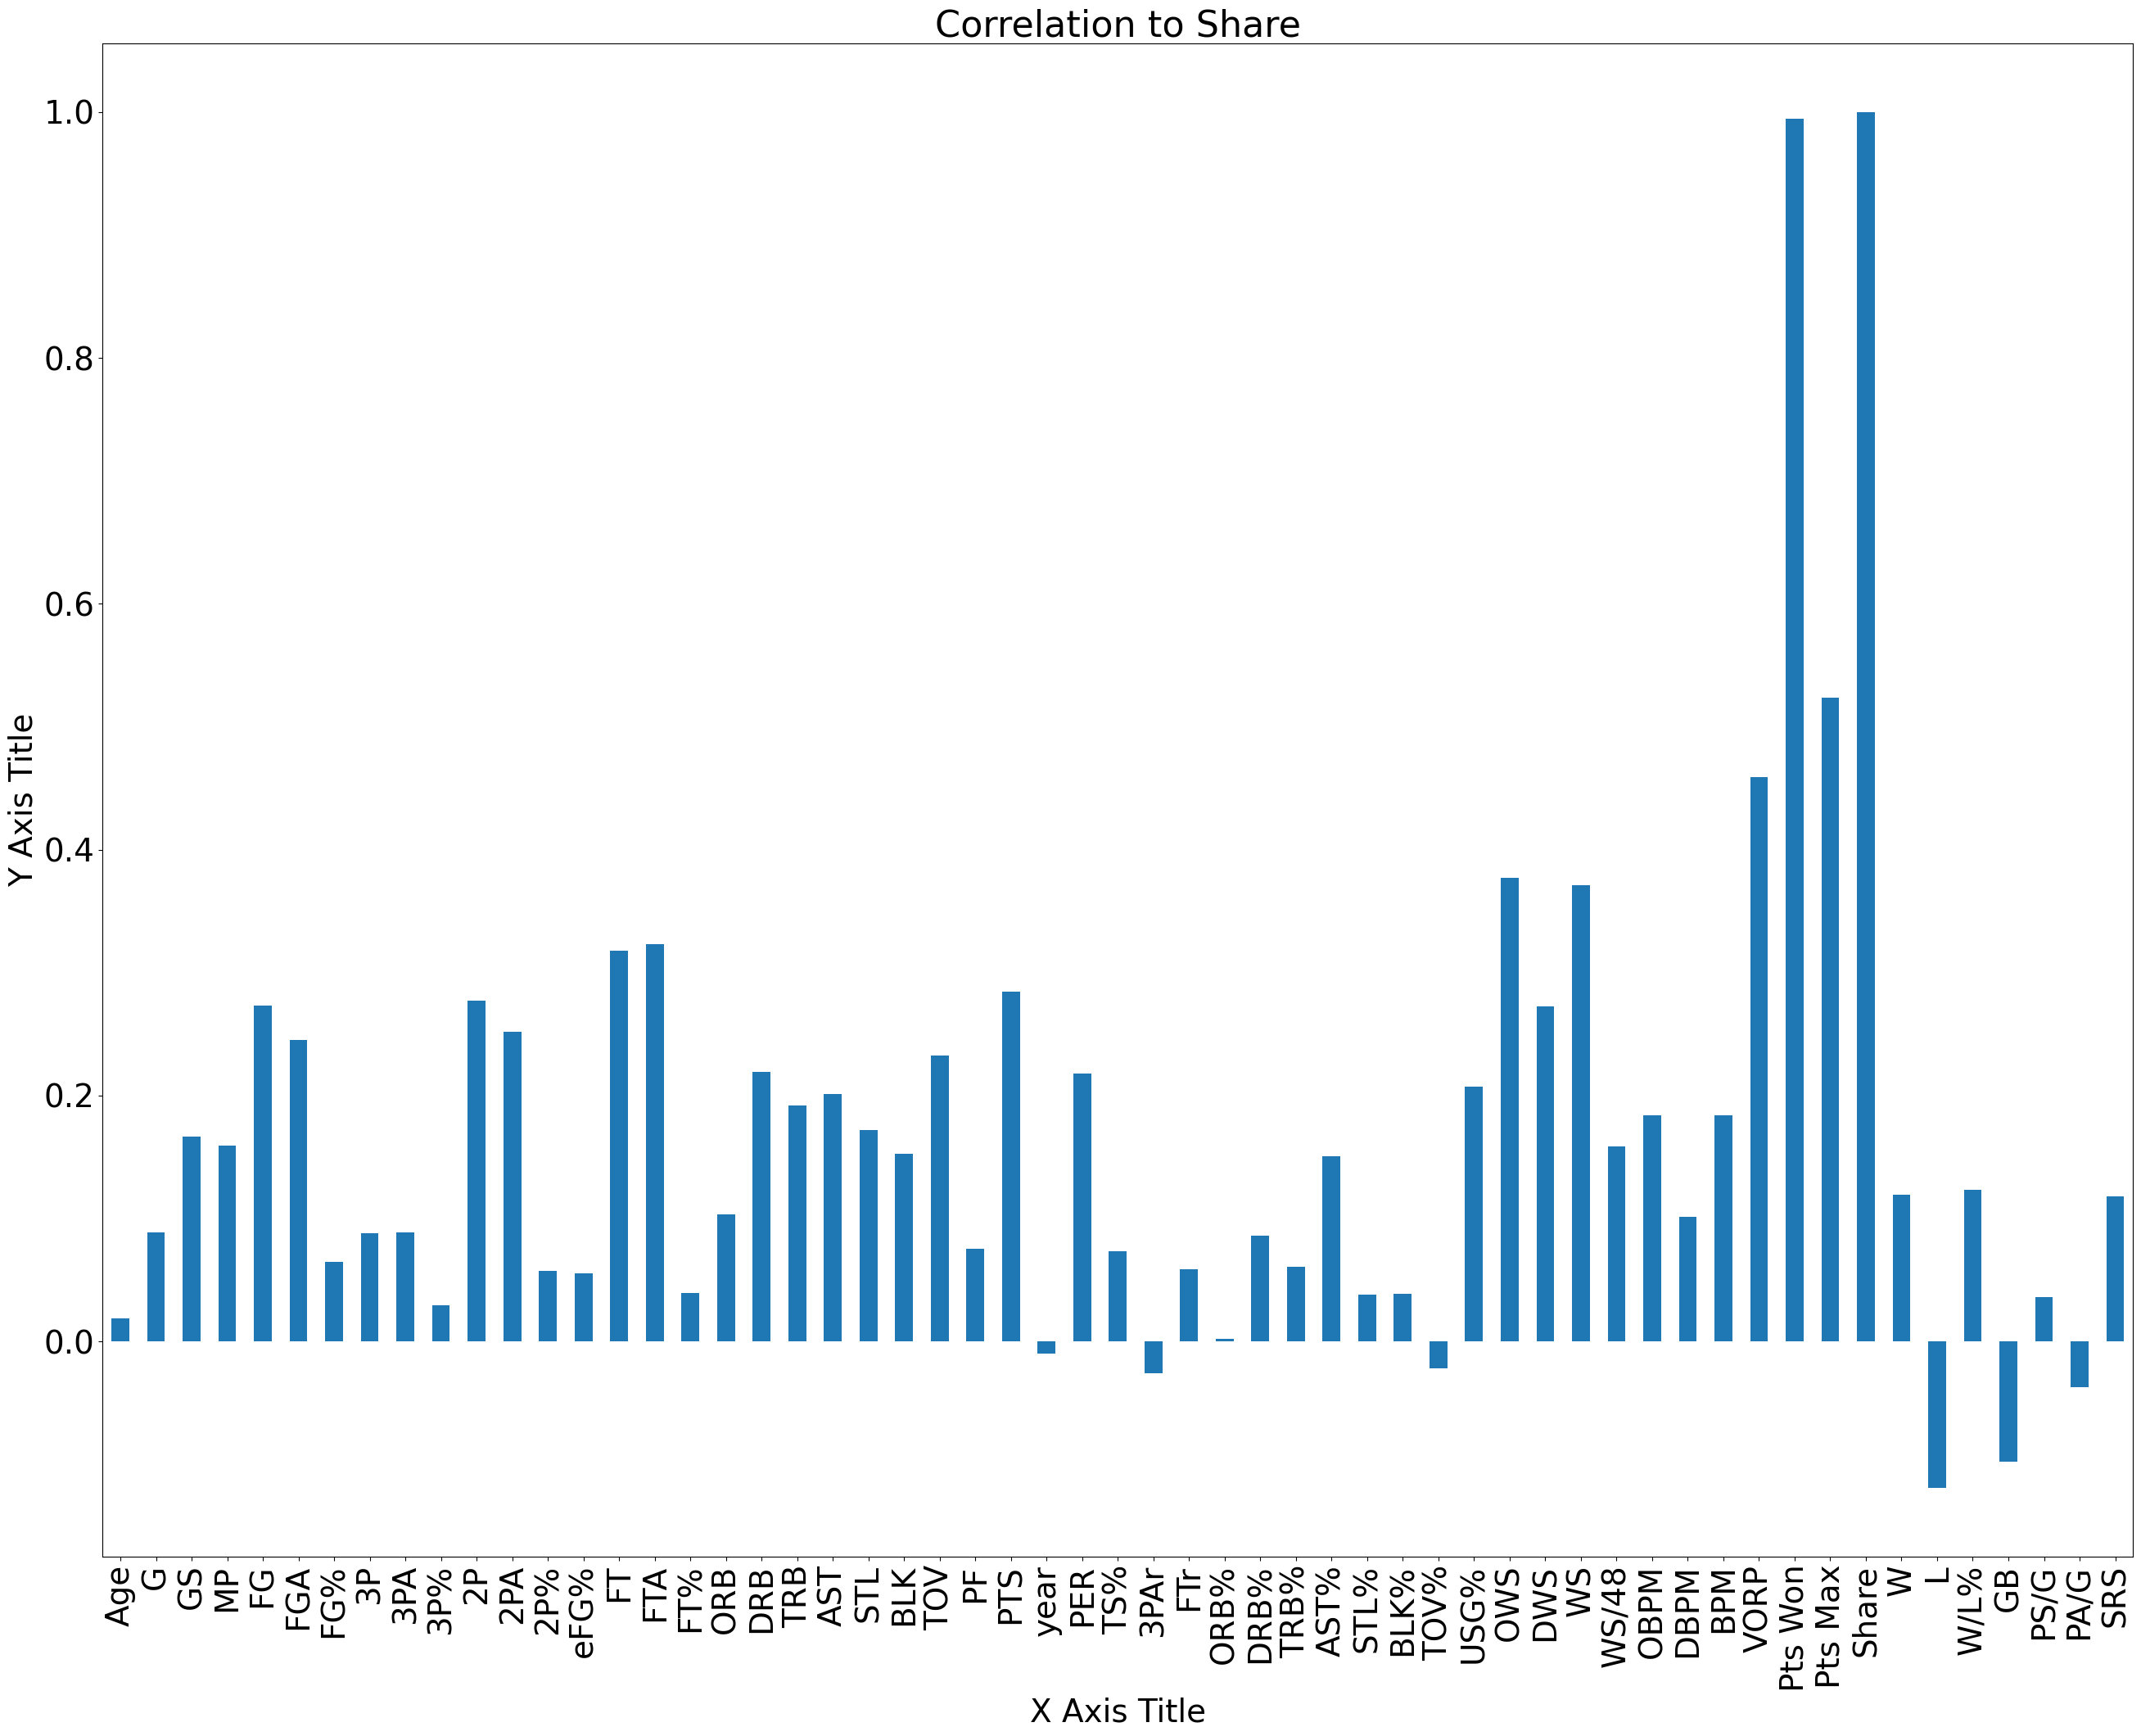

In [76]:
corr_num = numerical_df.corr()['Share']
plt.figure(figsize=(32,24))
corr_num.plot.bar()
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)
plt.xlabel('X Axis Title', fontsize=28)
plt.ylabel('Y Axis Title', fontsize=28)
plt.title('Correlation to Share', fontsize=32)

In [77]:
numerical_df.corr()['Share'].sort_values(ascending=False)

Share      1.000000
Pts Won    0.994688
Pts Max    0.523973
VORP       0.459215
OWS        0.377287
WS         0.371118
FTA        0.323242
FT         0.317960
PTS        0.284548
2P         0.277279
FG         0.273348
DWS        0.272826
2PA        0.252143
FGA        0.244928
TOV        0.232659
DRB        0.219480
PER        0.217912
USG%       0.207016
AST        0.201248
TRB        0.192050
OBPM       0.183999
BPM        0.183995
STL        0.171757
GS         0.166344
MP         0.159174
WS/48      0.158789
BLK        0.152507
AST%       0.150955
W/L%       0.123259
W          0.119591
SRS        0.117731
ORB        0.103043
DBPM       0.101434
G          0.088749
3PA        0.088520
3P         0.088044
DRB%       0.085870
PF         0.075212
TS%        0.073203
FG%        0.064402
TRB%       0.060705
FTr        0.058426
2P%        0.057327
eFG%       0.055552
FT%        0.039420
BLK%       0.038584
STL%       0.038032
PS/G       0.035801
3P%        0.029407
Age        0.018716


concat the numerical data

In [78]:
year_share_mvp = data.groupby('year')['Share'].max().reset_index()

In [79]:
data_mvp_by_year = pd.merge(data, year_share_mvp, on=['year', 'Share'])

In [80]:
data_mvp_by_year.sort_values('year', ascending=True)

Player Pos  Age   Tm   G  GS    MP    FG   FGA    FG%  ...  \
0          Michael Jordan  SG   27  CHI  82  82  37.0  12.1  22.4  0.539  ...   
1          Michael Jordan  SG   28  CHI  80  80  38.8  11.8  22.7  0.519  ...   
26        Charles Barkley  PF   29  PHO  76  76  37.6   9.4  18.1  0.520  ...   
13        Hakeem Olajuwon   C   31  HOU  80  80  41.0  11.2  21.2  0.528  ...   
29         David Robinson   C   29  SAS  81  81  38.0   9.7  18.4  0.530  ...   
2          Michael Jordan  SG   32  CHI  82  82  37.7  11.2  22.6  0.495  ...   
32            Karl Malone  PF   33  UTA  82  82  36.6  10.5  19.2  0.550  ...   
3          Michael Jordan  SG   34  CHI  82  82  38.8  10.7  23.1  0.465  ...   
33            Karl Malone  PF   35  UTA  49  49  37.4   8.0  16.3  0.493  ...   
15       Shaquille O'Neal   C   27  LAL  79  79  40.0  12.1  21.1  0.574  ...   
24          Allen Iverson  SG   25  PHI  71  71  42.0  10.7  25.5  0.420  ...   
30             Tim Duncan  PF   25  SAS  82  82  40.6   9.3  18.3  0.508  ...   
31             Tim Duncan  PF   26  SAS  81  81  39.3   8.8  17.2  0.513  ...   
21          Kevin Garnett  PF   27  MIN  82  82  39.4   9.8  19.6  0.499  ...   
27             Steve Nash  PG   30  PHO  75  75  34.3   5.7  11.4  0.502  ...   
28             Steve Nash  PG   31  PHO  79  79  35.4   6.8  13.4  0.512  ...   
7           Dirk Nowitzki  PF   28  DAL  78  78  36.2   8.6  17.2  0.502  ...   
16            Kobe Bryant  SG   29  LAL  82  82  38.9   9.5  20.6  0.459  ...   
5            LeBron James  SF   24  CLE  81  81  37.7   9.7  19.9  0.489  ...   
6            LeBron James  SF   25  CLE  76  76  39.0  10.1  20.1  0.503  ...   
4            Derrick Rose  PG   22  CHI  81  81  37.4   8.8  19.7  0.445  ...   
17           LeBron James  SF   27  MIA  62  62  37.5  10.0  18.9  0.531  ...   
18           LeBron James  PF   28  MIA  76  76  37.9  10.1  17.8  0.565  ...   
22           Kevin Durant  SF   25  OKC  81  81  38.5  10.5  20.8  0.503  ...   
11          Stephen Curry  PG   26  GSW  80  80  32.7   8.2  16.8  0.487  ...   
12          Stephen Curry  PG   27  GSW  79  79  34.2  10.2  20.2  0.504  ...   
23      Russell Westbrook  PG   28  OKC  81  81  34.6  10.2  24.0  0.425  ...   
14           James Harden  SG   28  HOU  72  72  35.4   9.0  20.1  0.449  ...   
19  Giannis Antetokounmpo  PF   24  MIL  72  72  32.8  10.0  17.3  0.578  ...   
20  Giannis Antetokounmpo  PF   25  MIL  63  63  30.4  10.9  19.7  0.553  ...   
8            Nikola Jokić   C   25  DEN  72  72  34.6  10.2  18.0  0.566  ...   
9            Nikola Jokić   C   26  DEN  74  74  33.5  10.3  17.7  0.583  ...   
25            Joel Embiid   C   28  PHI  66  66  34.6  11.0  20.1  0.548  ...   
10           Nikola Jokić   C   28  DEN  79  79  34.6  10.4  17.9  0.583  ...   

    Pts Max  Share                    team   W   L   W/L%   GB   PS/G   PA/G  \
0     960.0  0.928           Chicago Bulls  61  21  0.744  0.0  110.0  101.0   
1     960.0  0.938           Chicago Bulls  67  15  0.817  0.0  109.9   99.5   
26    980.0  0.852            Phoenix Suns  62  20  0.756  0.0  113.4  106.7   
13   1010.0  0.880         Houston Rockets  58  24  0.707  0.0  101.1   96.8   
29   1050.0  0.858       San Antonio Spurs  62  20  0.756  0.0  106.6  100.6   
2    1130.0  0.986           Chicago Bulls  72  10  0.878  0.0  105.2   92.9   
32   1150.0  0.857               Utah Jazz  64  18  0.780  0.0  103.1   94.3   
3    1160.0  0.934           Chicago Bulls  62  20  0.756  0.0   96.7   89.6   
33   1180.0  0.701               Utah Jazz  37  13  0.740  0.0   93.3   86.8   
15   1210.0  0.998      Los Angeles Lakers  67  15  0.817  0.0  100.8   92.3   
24   1240.0  0.904      Philadelphia 76ers  56  26  0.683  0.0   94.7   90.4   
30   1260.0  0.757       San Antonio Spurs  58  24  0.707  0.0   96.7   90.5   
31   1190.0  0.808       San Antonio Spurs  60  22  0.732  0.0   95.8   90.4   
21   1230.0  0.991  Minnesota Timberwolves  58  24  0.707  0.0 

In [81]:
len(data.columns)

61

In [82]:
for_plot = data_mvp_by_year[['G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PER',
       'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%',
       'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM',
       'VORP', 'Pts Won', 'Pts Max', 'Share','W', 'L', 'W/L%', 'GB',
       'PS/G', 'PA/G', 'SRS']]

Plot the statistic of MVP winner from 1991 - 2024

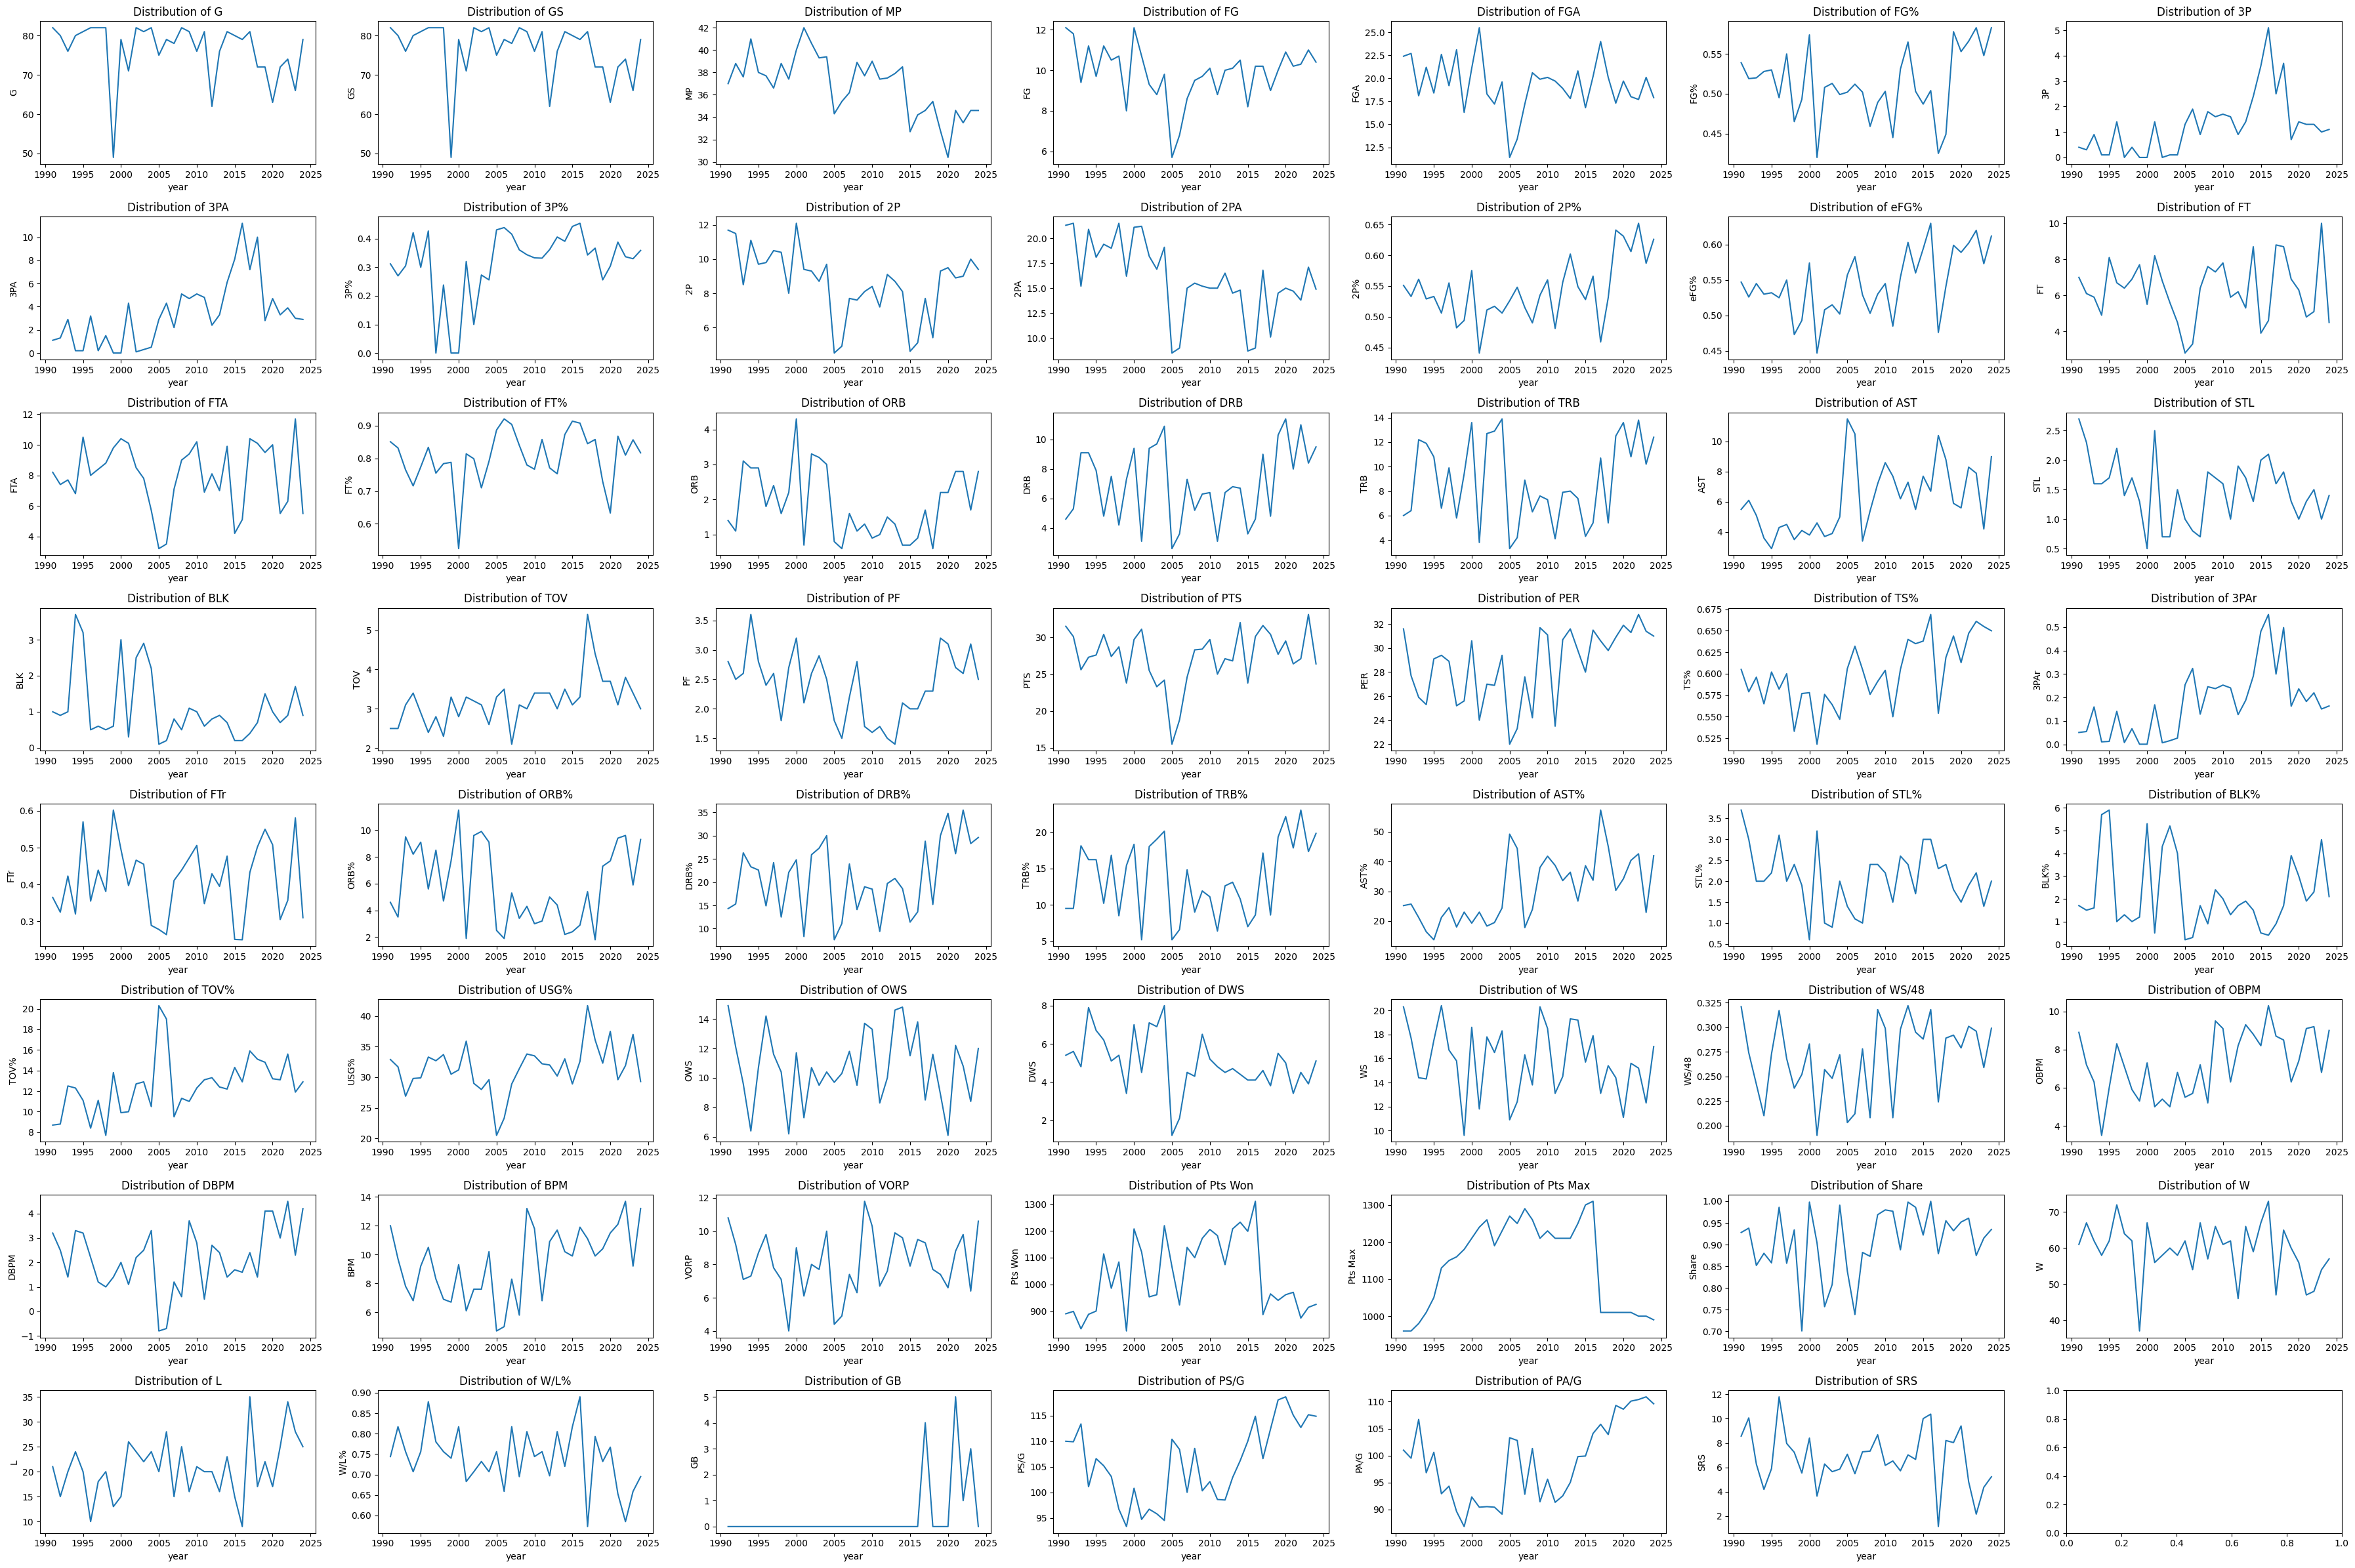

In [83]:
fig, ax = plt.subplots(nrows=8, ncols=7, figsize=(36, 24))
axes = ax.flatten()

for i, col in enumerate(for_plot.columns):
    sns.lineplot(x=data_mvp_by_year['year'],y=for_plot[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [84]:
for_plot.min()

G           49.000
GS          49.000
MP          30.400
FG           5.700
FGA         11.400
FG%          0.420
3P           0.000
3PA          0.000
3P%          0.000
2P           4.500
2PA          8.500
2P%          0.441
eFG%         0.447
FT           2.800
FTA          3.200
FT%          0.524
ORB          0.600
DRB          2.600
TRB          3.300
AST          2.900
STL          0.500
BLK          0.100
TOV          2.100
PF           1.400
PTS         15.500
PER         22.000
TS%          0.518
3PAr         0.001
FTr          0.250
ORB%         1.800
DRB%         7.600
TRB%         5.200
AST%        13.700
STL%         0.600
BLK%         0.200
TOV%         7.700
USG%        20.500
OWS          6.100
DWS          1.200
WS           9.600
WS/48        0.190
OBPM         3.500
DBPM        -0.800
BPM          4.700
VORP         4.000
Pts Won    827.000
Pts Max    960.000
Share        0.701
W           37.000
L            9.000
W/L%         0.573
GB           0.000
PS/G        

checking coreelation value to target col

In [85]:
numerical_df.corr()['Share'].sort_values(ascending=False)

Share      1.000000
Pts Won    0.994688
Pts Max    0.523973
VORP       0.459215
OWS        0.377287
WS         0.371118
FTA        0.323242
FT         0.317960
PTS        0.284548
2P         0.277279
FG         0.273348
DWS        0.272826
2PA        0.252143
FGA        0.244928
TOV        0.232659
DRB        0.219480
PER        0.217912
USG%       0.207016
AST        0.201248
TRB        0.192050
OBPM       0.183999
BPM        0.183995
STL        0.171757
GS         0.166344
MP         0.159174
WS/48      0.158789
BLK        0.152507
AST%       0.150955
W/L%       0.123259
W          0.119591
SRS        0.117731
ORB        0.103043
DBPM       0.101434
G          0.088749
3PA        0.088520
3P         0.088044
DRB%       0.085870
PF         0.075212
TS%        0.073203
FG%        0.064402
TRB%       0.060705
FTr        0.058426
2P%        0.057327
eFG%       0.055552
FT%        0.039420
BLK%       0.038584
STL%       0.038032
PS/G       0.035801
3P%        0.029407
Age        0.018716


In [86]:
data_mvp_by_year.min()

Player    Allen Iverson
Pos                   C
Age                  22
Tm                  CHI
G                    49
              ...      
W/L%              0.573
GB                  0.0
PS/G               93.3
PA/G               86.8
SRS                1.14
Length: 61, dtype: object

Checking the outliers of the data

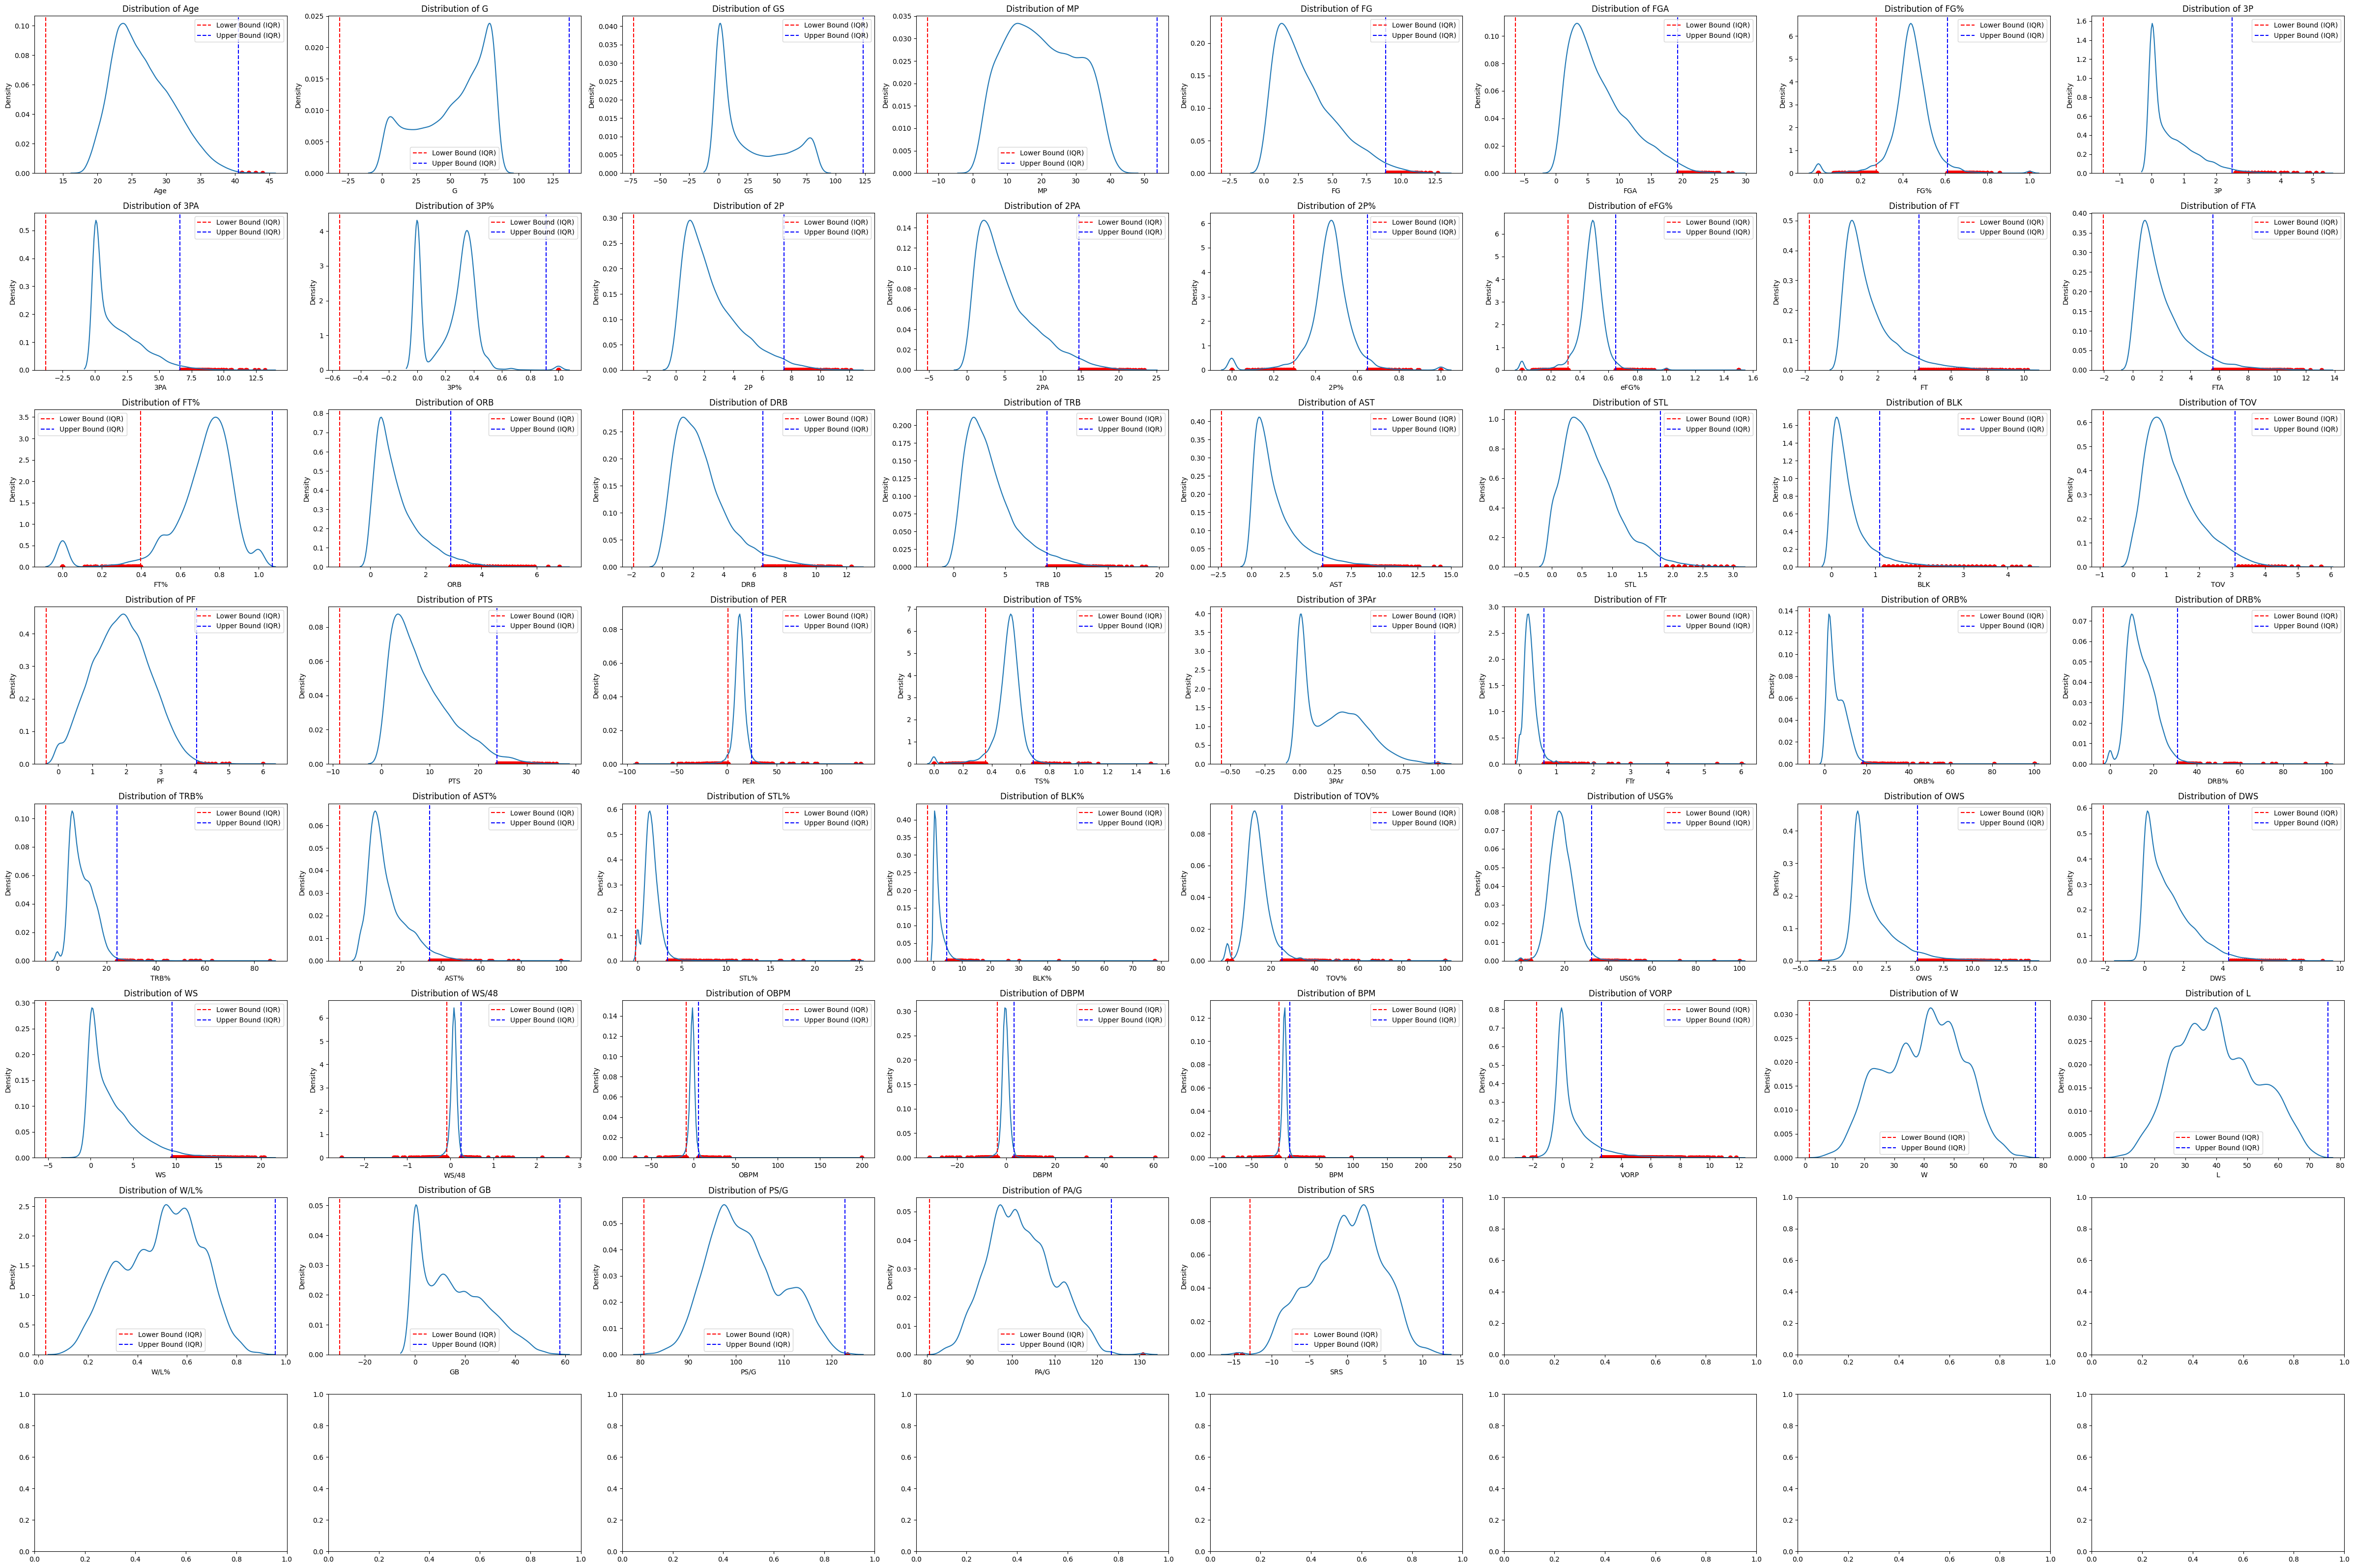

In [87]:
fig, ax = plt.subplots(nrows=8, ncols=8, figsize=(48, 32))
axes = ax.flatten()

for i, col in enumerate(X_train_num.columns):
    sns.kdeplot(X_train_num[col], ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    

    q1 = np.percentile(X_train_num[col], 25)
    q3 = np.percentile(X_train_num[col], 75)
    iqr = q3 - q1
    

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr


    axes[i].axvline(lower_bound, color='red', linestyle='--', label='Lower Bound (IQR)')
    axes[i].axvline(upper_bound, color='blue', linestyle='--', label='Upper Bound (IQR)')
    
 
    outliers = X_train_num[(X_train_num[col] < lower_bound) | (X_train_num[col] > upper_bound)]
    axes[i].scatter(outliers[col], np.zeros_like(outliers[col]), color='red')

    axes[i].legend()

plt.tight_layout()
plt.show()

we can see that there are no player that have 3 point attempt and have played in a season less than 20 games (logically correct)

In [88]:
train[(train['3PA'] > 10.0)&(train['G']< 20)]

Empty DataFrame
Columns: [Player, Pos, Age, Tm, G, GS, MP, FG, FGA, FG%, 3P, 3PA, 3P%, 2P, 2PA, 2P%, eFG%, FT, FTA, FT%, ORB, DRB, TRB, AST, STL, BLK, TOV, PF, PTS, year, PER, TS%, 3PAr, FTr, ORB%, DRB%, TRB%, AST%, STL%, BLK%, TOV%, USG%, OWS, DWS, WS, WS/48, OBPM, DBPM, BPM, VORP, Pts Won, Pts Max, Share, team, W, L, W/L%, GB, PS/G, PA/G, SRS]
Index: []

[0 rows x 61 columns]

In [89]:
train[(train['eFG%']>1.0)]

Player Pos  Age   Tm  G  GS   MP   FG  FGA  FG%  ...  Pts Max  \
442      Jordan Sibert  SG   26  ATL  1   0  4.0  1.0  1.0  1.0  ...      0.0   
3580     Tyson Wheeler  PG   23  DEN  1   0  3.0  1.0  1.0  1.0  ...      0.0   
4764     Dajuan Wagner  SG   23  GSW  1   0  7.0  1.0  1.0  1.0  ...      0.0   
9072     Anthony Brown  SF   25  MIN  1   0  4.0  1.0  1.0  1.0  ...      0.0   
15039  Naz Mitrou-Long  SG   24  UTA  1   0  1.0  1.0  1.0  1.0  ...      0.0   

       Share                    team   W   L   W/L%    GB   PS/G   PA/G   SRS  
442      0.0           Atlanta Hawks  29  53  0.354  13.0  113.3  119.4 -6.06  
3580     0.0          Denver Nuggets  14  36  0.280  23.0   93.5  100.1 -6.67  
4764     0.0   Golden State Warriors  42  40  0.512  19.0  106.5  106.9  0.00  
9072     0.0  Minnesota Timberwolves  47  35  0.573   2.0  109.5  107.3  2.35  
15039    0.0               Utah Jazz  48  34  0.585   1.0  104.1   99.8  4.47  

[5 rows x 61 columns]

In [90]:
train[(train['USG%'] > 45) & (train['G'] < 20)]

Player Pos  Age   Tm  G  GS   MP   FG  FGA    FG%  ...  \
79          Howard Nathan  PG   24  ATL  5   0  3.0  1.0  1.8  0.556  ...   
513      Donovan Williams  SG   21  ATL  2   0  2.0  1.0  2.5  0.400  ...   
1875           Jack Haley   C   32  CHI  1   0  7.0  2.0  6.0  0.333  ...   
3574        Kelly McCarty  SG   23  DEN  2   0  2.0  1.0  1.5  0.667  ...   
5491       Terrence Jones  PF   27  HOU  2   0  2.5  0.5  2.0  0.250  ...   
6371            Von Wafer  SF   21  LAC  1   0  1.0  0.0  1.0  0.000  ...   
6770           Shea Seals  SG   22  LAL  4   0  2.3  0.3  2.0  0.125  ...   
7945      DeAndre Liggins  SG   25  MIA  1   0  1.0  1.0  1.0  1.000  ...   
9309     Gheorghe Mureșan   C   27  NJN  1   0  1.0  0.0  1.0  0.000  ...   
9444            Mile Ilić   C   22  NJN  5   0  1.2  0.0  0.6  0.000  ...   
9857   Izaiah Brockington  PG   24  NOP  1   0  3.0  2.0  5.0  0.400  ...   
10013           Ben Davis  PF   26  NYK  8   0  2.6  0.9  2.1  0.412  ...   
10099       Jackie Butler   C   19  NYK  3   0  1.7  1.3  1.3  1.000  ...   
10759   Darrell Armstrong  PG   26  ORL  3   0  2.7  1.0  2.7  0.375  ...   
12264          Paris Bass  SF   26  PHO  2   0  3.5  1.0  3.0  0.333  ...   
13398        Chuck Nevitt   C   34  SAS  1   0  1.0  0.0  0.0  0.000  ...   
14211          Mark Baker  PG   29  TOR  1   0  2.0  0.0  1.0  0.000  ...   
14650        Bob Thornton  PF   29  UTA  2   0  3.0  0.5  3.5  0.143  ...   

       Pts Max  Share                  team   W   L   W/L%    GB   PS/G  \
79         0.0    0.0         Atlanta Hawks  46  36  0.561  26.0   98.3   
513        0.0    0.0         Atlanta Hawks  41  41  0.500   3.0  118.4   
1875       0.0    0.0         Chicago Bulls  72  10  0.878   0.0  105.2   
3574       0.0    0.0        Denver Nuggets  14  36  0.280  23.0   93.5   
5491       0.0    0.0       Houston Rockets  53  29  0.646   0.0  113.9   
6371       0.0    0.0  Los Angeles Clippers  40  42  0.488  21.0   95.6   
6770       0.0    0.0    Los Angeles Lakers  61  21  0.744   0.0  105.5   
7945       0.0    0.0            Miami Heat  54  28  0.659   0.0  102.2   
9309       0.0    0.0       New Jersey Nets  16  34  0.320  17.0   91.4   
9444       0.0    0.0       New Jersey Nets  41  41  0.500   6.0   97.6   
9857       0.0    0.0  New Orleans Pelicans  49  33  0.598   1.0  115.1   
10013      0.0    0.0       New York Knicks  27  23  0.540   6.0   86.4   
10099      0.0    0.0       New York Knicks  33  49  0.402  12.0   97.3   
10759      0.0    0.0         Orlando Magic  57  25  0.695   0.0  110.9   
12264      0.0    0.0          Phoenix Suns  64  18  0.780   0.0  114.8   
13398      0.0    0.0     San Antonio Spurs  55  27  0.671   3.0  100.0   
14211      0.0    0.0       Toronto Raptors  23  27  0.460  10.0   91.1   
14650      0.0    0.0             Utah Jazz  55  27  0.671   0.0  108.3   

        PA/G    SRS  
79      97.1   1.29  
513    118.1   0.32  
1875    92.9  11.80  
3574   100.1  -6.67  
5491   109.1   4.96  
6371    96.1  -0.07  
6770    97.8   6.88  
7945    97.4   4.15  
9309    95.2  -3.20  
9444    98.3  -1.00  
9857   110.7   4.46  
10013   85.4   1.45  
10099   99.7  -2.72  
10759  103.8   6.44  
12264  107.3   6.94  
13398   94.8   5.05  
14211   92.8  -1.32  
14650  101.9   5.70  

[18 rows x 61 columns]

In [91]:
idx_to_drop = train[
    (train['3P%'] > 0.8) & (train['G']<20)|
    (train['STL%'] > 7.5) & (train['G'] < 20)|
    (train['BPM'] > 50) & (train['G'] < 20)|
    (train['DBPM'] > 8) & (train['G'] < 20)|
    (train['OBPM'] > 30) & (train['G'] < 20)|
    (train['DBPM'] < -20) & (train['G'] < 20)|
    (train['OBPM'] < -30) & (train['G'] < 20)|
    (train['WS/48']>0.3) & (train['G'] < 20)|
    (train['WS/48'] < -0.4) & (train['G'] < 20)|
    (train['DRB%'] > 40) & (train['G'] < 20)|
    (train['ORB%'] > 30) & (train['G'] < 20)|
    (train['USG%'] > 45) & (train['G'] < 20)|
    (train['TOV%']>60)|
    (train['BLK%']>40)|
    (train['AST%']>60)|
    (train['TRB%']>45)|
    (train['TS%']>1)|
    (train['PER']>45)|
    (train['PER']<-40)|
    (train['eFG%']>1.0)
    
].index.tolist()

In [92]:
len(idx_to_drop)

260

In [93]:
X_train_dropped = X_train.drop(index=idx_to_drop)
y_train_dropped = y_train.drop(index=idx_to_drop)

In [94]:
X_train_dropped.shape

(15548, 58)

In [95]:
print('Shape of X train after dropped:', X_train_dropped.shape)
X_train_dropped.shape

Shape of X train after dropped: (15548, 58)


(15548, 58)

In [96]:
train.shape

(15808, 61)

In [97]:
X_train_num, X_train_cat = split_numerical_categorical(data=X_train_dropped,num_cols=num_column,cat_cols=cat_column)

Data num shape: (15548, 53)
Data cat shape: (15548, 1)


In [98]:
X_train_cat.isna().sum()

Pos    0
dtype: int64

In [99]:

def cat_OHE_encoder_fit(data):
    ''' 
    Fit a OneHotEncoder to the categorical data.

    Parameters

    data : pandas.DataFrame
    DataFrame containing categorical data to be encoded.

    Returns

    OneHotEncoder
    A fitted OneHotEncoder object, which can be used to transform the data
    '''
    encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    encoder.fit(data)
    return encoder

def cat_OHE_encoder_transform(data, encoder):
    ''' 
    Parameters

    data : pandas.DataFrame
    DataFrame containing categorical data to be encoded.

    encoder : OneHotEncoder
    A fitted OneHotEncoder object used to encode the data.

    Returns

    pandas.DataFrame
    '''
    encoded_array = encoder.transform(data)
    feature_names = encoder.get_feature_names_out()
    cleaned_columns = [col.split('_')[-1] for col in feature_names]
    encoded_data = pd.DataFrame(encoded_array, columns=cleaned_columns, index=data.index)
    return encoded_data

In [100]:
ohe_data = X_train_cat
cat_ohe_encoder = cat_OHE_encoder_fit(ohe_data)
X_train_cat_ohe_encoded = cat_OHE_encoder_transform(ohe_data,cat_ohe_encoder)

In [101]:
def fit_scaler(data):
    '''  
    Fits a StandardScaler to the numerical data.

    This function computes the mean and standard deviation for each feature in the data to standardize them.

    Parameters:
    data (pd.DataFrame): DataFrame containing numerical data to be scaled.

    Returns:
    scaler (StandardScaler): A fitted StandardScaler object that can be used to transform the data.
    '''
    scaler = StandardScaler()
    scaler.fit(data)
    return scaler
def transform_scaler(data, scaler):
    '''  
    Transforms the numerical data using a fitted StandardScaler.

    This function scales the data based on the mean and standard deviation computed by the fitted StandardScaler.

    Parameters:
    data (pd.DataFrame): DataFrame containing numerical data to be scaled.
    scaler (StandardScaler): A fitted StandardScaler object used for scaling the data.

    Returns:
    scaled_data (pd.DataFrame): DataFrame containing the scaled numerical data.
    '''
    scaled_array = scaler.transform(data)
    scaled_data = pd.DataFrame(scaled_array, index=data.index, columns=data.columns)
    return scaled_data

In [102]:
scaler = fit_scaler(X_train_num)
X_train_num_stand = transform_scaler(X_train_num, scaler)

In [103]:
def concat_data(num_data, cat_data):
    '''  
    Concatenates numerical and categorical data into a single DataFrame.

    This function ensures that the indices of the numerical and categorical data match before concatenation. If the indices do not match, the categorical data is reindexed to match the numerical data.

    Parameters:
    - num_data (pd.DataFrame): DataFrame containing numerical data.
    - cat_data (pd.DataFrame): DataFrame containing categorical data.

    Returns:
    - concatenated_data (pd.DataFrame): DataFrame with both numerical and categorical data concatenated along columns.
    '''
    if not num_data.index.equals(cat_data.index):
        cat_data = cat_data.reindex(num_data.index)
    concatenated_data = pd.concat([num_data, cat_data], axis=1)
    print(f'Numerical data shape  : {num_data.shape}')
    print(f'Categorical data shape: {cat_data.shape}')
    print(f'Concat data shape     : {concatenated_data.shape}')
    return concatenated_data

In [104]:
X_train_concat = concat_data(X_train_num_stand,X_train_cat_ohe_encoded)

Numerical data shape  : (15548, 53)
Categorical data shape: (15548, 5)
Concat data shape     : (15548, 58)


In [105]:
X_train_concat.head()

Age         G        GS        MP        FG       FGA       FG%  \
0  0.550546  1.069328  1.847865  1.225979  1.106130  1.274367 -0.050145   
1  1.020908  1.150491  1.917071  1.758734  2.863936  2.842507  0.342297   
2 -0.390179  1.028746 -0.816596 -0.563275 -0.426317 -0.508587  0.555337   
3 -0.860541 -1.974320 -0.885802 -1.829825 -1.417900 -1.496730 -4.927637   
4  0.315365  1.069328 -0.816596  0.311248  0.835698  0.844740  0.241384   

         3P       3PA       3P%  ...      W/L%        GB      PS/G      PA/G  \
0  0.713397  0.855984  0.547124  ...  0.181087  0.203369  1.031146  0.897048   
1  0.573117  0.749339  0.576431  ...  0.181087  0.203369  1.031146  0.897048   
2 -0.829677 -0.903662  2.487266  ...  0.181087  0.203369  1.031146  0.897048   
3 -0.829677 -0.903662 -1.422325  ...  0.181087  0.203369  1.031146  0.897048   
4 -0.549118 -0.583726  0.254051  ...  0.181087  0.203369  1.031146  0.897048   

        SRS    C   PF   PG   SF   SG  
0  0.184628  0.0  0.0  1.0  0.0  0.0  
1  0.184628  0.0  0.0  0.0  1.0  0.0  
2  0.184628  0.0  0.0  0.0  1.0  0.0  
3  0.184628  1.0  0.0  0.0  0.0  0.0  
4  0.184628  0.0  0.0  0.0  0.0  1.0  

[5 rows x 58 columns]

In [106]:
X_train_concat.shape

(15548, 58)

In [107]:
X_train_num.columns

Index(['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P',
       '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%',
       'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS',
       'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'W', 'L', 'W/L%', 'GB',
       'PS/G', 'PA/G', 'SRS'],
      dtype='object')

In [108]:
def preprocess_data(data, num_cols,cat_cols,cat_ohe_encoder,scaler):
    num_data = data[num_cols]
    cat_data = data[cat_cols]
    num_data_scaler = transform_scaler(num_data, scaler)
    cat_ohe_data_encoded = cat_OHE_encoder_transform(cat_data,cat_ohe_encoder)
    processed_data = concat_data(num_data_scaler, cat_ohe_data_encoded)
    # print(f"Original data shape:{processed_data.shape}")
    # clean_data = transform_scaler(processed_data, scaler)
    print(f'Mapped data shape  : {processed_data.shape}')
    return processed_data

In [109]:
X_train_clean = preprocess_data(
    data=X_train_dropped, 
    num_cols=num_column, 
    cat_cols=cat_column, 
    cat_ohe_encoder = cat_ohe_encoder,
    scaler=scaler
)

Numerical data shape  : (15548, 53)
Categorical data shape: (15548, 5)
Concat data shape     : (15548, 58)
Mapped data shape  : (15548, 58)


In [110]:
y_train_dropped.shape

(15548,)

In [111]:
X_test

Player Pos  Age   Tm   G  GS    MP   FG   FGA    FG%  ...  \
0           Caris LeVert  SG   30  ATL  41   3  24.1  3.7   8.0  0.460  ...   
1           Clint Capela   C   30  ATL  45  41  22.4  4.2   7.3  0.573  ...   
2        Daeqwon Plowden  SG   26  ATL   2   0  16.5  4.0   5.0  0.800  ...   
3            David Roddy  PF   23  ATL  27   3  12.8  1.6   3.4  0.473  ...   
4        Dominick Barlow  SF   21  ATL  16   2   8.2  1.3   2.8  0.455  ...   
..                   ...  ..  ...  ...  ..  ..   ...  ...   ...    ...  ...   
528      Malcolm Brogdon  PG   32  WAS  24  13  23.5  4.3  10.0  0.433  ...   
529    Marvin Bagley III   C   25  WAS  19   1   8.7  2.0   3.7  0.535  ...   
530  Patrick Baldwin Jr.  SF   22  WAS  22   0   4.6  0.8   1.5  0.515  ...   
531       Richaun Holmes  PF   31  WAS  17   4  15.9  2.4   3.7  0.651  ...   
532     Tristan Vukcevic   C   21  WAS  14   0   8.1  1.9   3.9  0.500  ...   

     BPM  VORP                team   W   L   W/L%    GB   PS/G   PA/G    SRS  
0    1.3   0.8       Atlanta Hawks  26  29  0.473   0.5  116.7  119.1  -2.58  
1   -1.1   0.2       Atlanta Hawks  26  29  0.473   0.5  116.7  119.1  -2.58  
2    8.4   0.1       Atlanta Hawks  26  29  0.473   0.5  116.7  119.1  -2.58  
3   -1.4   0.1       Atlanta Hawks  26  29  0.473   0.5  116.7  119.1  -2.58  
4   -4.0  -0.1       Atlanta Hawks  26  29  0.473   0.5  116.7  119.1  -2.58  
..   ...   ...                 ...  ..  ..    ...   ...    ...    ...    ...  
528 -1.6   0.1  Washington Wizards   9  45  0.167  17.0  108.6  122.0 -12.05  
529 -1.0   0.0  Washington Wizards   9  45  0.167  17.0  108.6  122.0 -12.05  
530 -0.3   0.0  Washington Wizards   9  45  0.167  17.0  108.6  122.0 -12.05  
531 -0.5   0.1  Washington Wizards   9  45  0.167  17.0  108.6  122.0 -12.05  
532  2.1   0.1  Washington Wizards   9  45  0.167  17.0  108.6  122.0 -12.05  

[533 rows x 58 columns]

In [112]:
X_test_clean = preprocess_data(
    data=X_test, 
    num_cols=num_column, 
    cat_cols=cat_column, 
    cat_ohe_encoder = cat_ohe_encoder,
    scaler=scaler
)

Numerical data shape  : (533, 53)
Categorical data shape: (533, 5)
Concat data shape     : (533, 58)
Mapped data shape  : (533, 58)


In [113]:

def extract_cv_results(cv_obj):

    best_train_score = -cv_obj.cv_results_['mean_train_score'][cv_obj.best_index_]

    best_valid_score = -cv_obj.best_score_  
    
    best_params = cv_obj.best_params_
    
    return best_train_score, best_valid_score, best_params


im using time series cv since my data was temporal

In [114]:
tscv = TimeSeriesSplit(n_splits=5)

Experimenting PCA, since my data was high dimentionality

In [115]:
pcas = PCA(n_components=0.95)
X_train_pca = pcas.fit_transform(X_train_clean)
X_test_pca = pcas.transform(X_test_clean)

-------------

# Modeling the data

### Baseline

In [116]:
param_grid_base = {'strategy': ['mean']}
baseline_model = DummyRegressor()
reg_base = GridSearchCV(baseline_model, param_grid_base, scoring='neg_root_mean_squared_error', cv=tscv,return_train_score=True)
reg_base.fit(X_train_clean, y_train_dropped)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=DummyRegressor(), param_grid={'strategy': ['mean']},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [117]:
train_base, valid_base, best_param_base = extract_cv_results(reg_base)

print(f'Train score - Baseline model: {train_base}')
print(f'Valid score - Baseline model: {valid_base}')
print(f'Best Params - Baseline model: {best_param_base}')

Train score - Baseline model: 0.05886102000796271
Valid score - Baseline model: 0.05870899614063798
Best Params - Baseline model: {'strategy': 'mean'}


----------------------------
### Baseline with PCA

In [118]:
param_grid_base_pca = {'strategy': ['mean']}
baseline_model_pca = DummyRegressor()
reg_base_pca = GridSearchCV(baseline_model_pca, param_grid_base_pca, scoring='neg_root_mean_squared_error', cv=tscv,return_train_score=True)
reg_base_pca.fit(X_train_pca, y_train_dropped)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=DummyRegressor(), param_grid={'strategy': ['mean']},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [119]:
train_base_pca, valid_base_pca, best_param_base_pca = extract_cv_results(reg_base_pca)

print(f'Train score - Baseline model: {train_base_pca}')
print(f'Valid score - Baseline model: {valid_base_pca}')
print(f'Best Params - Baseline model: {best_param_base_pca}')

Train score - Baseline model: 0.05886102000796271
Valid score - Baseline model: 0.05870899614063798
Best Params - Baseline model: {'strategy': 'mean'}


-------------------
### Ridge

In [120]:
param_grid_ridge = {
    'alpha': np.logspace(-6, 10, 100)  # Regularization strength from 10^-6 to 10^10
}
ridge = Ridge()
reg_ridge = GridSearchCV(ridge, param_grid_ridge, scoring='neg_root_mean_squared_error', cv=tscv,return_train_score=True)
reg_ridge.fit(X_train_clean, y_train_dropped)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-06, 1.45082878e-06, 2.10490414e-06, 3.05385551e-06,
       4.43062146e-06, 6.42807312e-06, 9.32603347e-06, 1.35304777e-05,
       1.96304065e-05, 2.84803587e-05, 4.13201240e-05, 5.99484250e-05,
       8.69749003e-05, 1.26185688e-04, 1.83073828...
       8.49753436e+06, 1.23284674e+07, 1.78864953e+07, 2.59502421e+07,
       3.76493581e+07, 5.46227722e+07, 7.92482898e+07, 1.14975700e+08,
       1.66810054e+08, 2.42012826e+08, 3.51119173e+08, 5.09413801e+08,
       7.39072203e+08, 1.07226722e+09, 1.55567614e+09, 2.25701972e+09,
       3.27454916e+09, 4.75081016e+09, 6.89261210e+09, 1.00000000e+10])},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [121]:
train_ridge, valid_ridge, best_param_ridge = extract_cv_results(reg_ridge)

print(f'Train score - Ridge model: {train_ridge}')
print(f'Valid score - Ridge model: {valid_ridge} ')
print(f'Best Params - Ridge model: {best_param_ridge}')

Train score - Ridge model: 0.04876292676027694
Valid score - Ridge model: 0.05054725355894474 
Best Params - Ridge model: {'alpha': np.float64(39.44206059437664)}


-----------------------------------
### Ridge with PCA

In [122]:
param_grid_ridge_pca = {
    'alpha': np.logspace(-6, 10, 100)  # Regularization strength from 10^-6 to 10^10
}
ridge = Ridge()
reg_ridge_pca = GridSearchCV(ridge, param_grid_ridge, scoring='neg_root_mean_squared_error', cv=tscv,return_train_score=True)
reg_ridge_pca.fit(X_train_pca, y_train_dropped)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-06, 1.45082878e-06, 2.10490414e-06, 3.05385551e-06,
       4.43062146e-06, 6.42807312e-06, 9.32603347e-06, 1.35304777e-05,
       1.96304065e-05, 2.84803587e-05, 4.13201240e-05, 5.99484250e-05,
       8.69749003e-05, 1.26185688e-04, 1.83073828...
       8.49753436e+06, 1.23284674e+07, 1.78864953e+07, 2.59502421e+07,
       3.76493581e+07, 5.46227722e+07, 7.92482898e+07, 1.14975700e+08,
       1.66810054e+08, 2.42012826e+08, 3.51119173e+08, 5.09413801e+08,
       7.39072203e+08, 1.07226722e+09, 1.55567614e+09, 2.25701972e+09,
       3.27454916e+09, 4.75081016e+09, 6.89261210e+09, 1.00000000e+10])},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [123]:
train_ridge_pca, valid_ridge_pca, best_param_ridge_pca = extract_cv_results(reg_ridge_pca)

print(f'Train score - Ridge model: {train_ridge_pca}')
print(f'Valid score - Ridge model: {valid_ridge_pca} ')
print(f'Best Params - Ridge model: {best_param_ridge_pca}')

Train score - Ridge model: 0.050936400293395766
Valid score - Ridge model: 0.05161666373105791 
Best Params - Ridge model: {'alpha': np.float64(367.8379771828634)}


--------
### Lasso

In [124]:
param_grid_lasso = {
    'alpha':np.logspace(-6, 10, 100)
}


lasso = Lasso()

reg_lasso = GridSearchCV(lasso, param_grid_lasso, cv=tscv,scoring='neg_root_mean_squared_error', return_train_score=True)
reg_lasso.fit(X_train_clean, y_train_dropped)


d:\software\New folder\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.579e+00, tolerance: 8.527e-04
  model = cd_fast.enet_coordinate_descent(
d:\software\New folder\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.987e+00, tolerance: 1.764e-03
  model = cd_fast.enet_coordinate_descent(
d:\software\New folder\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.089e+00, tolerance: 2.6

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-06, 1.45082878e-06, 2.10490414e-06, 3.05385551e-06,
       4.43062146e-06, 6.42807312e-06, 9.32603347e-06, 1.35304777e-05,
       1.96304065e-05, 2.84803587e-05, 4.13201240e-05, 5.99484250e-05,
       8.69749003e-05, 1.26185688e-04, 1.83073828...
       8.49753436e+06, 1.23284674e+07, 1.78864953e+07, 2.59502421e+07,
       3.76493581e+07, 5.46227722e+07, 7.92482898e+07, 1.14975700e+08,
       1.66810054e+08, 2.42012826e+08, 3.51119173e+08, 5.09413801e+08,
       7.39072203e+08, 1.07226722e+09, 1.55567614e+09, 2.25701972e+09,
       3.27454916e+09, 4.75081016e+09, 6.89261210e+09, 1.00000000e+10])},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [125]:
train_lasso, valid_lasso, best_param_lasso = extract_cv_results(reg_lasso)

print(f'Train score - Lasso model: {train_lasso}')
print(f'Valid score - Lasso model: {valid_lasso}')
print(f'Best Params - Lasso model: {best_param_lasso}')

Train score - Lasso model: 0.04871600541446706
Valid score - Lasso model: 0.050649142357063234
Best Params - Lasso model: {'alpha': np.float64(5.994842503189409e-05)}


-------
### Lasso with PCA

In [126]:
param_grid_lasso_pca = {
    'alpha':np.logspace(-6, 10, 100)
}


lasso = Lasso()

reg_lasso_pca = GridSearchCV(lasso, param_grid_lasso, cv=tscv,scoring='neg_root_mean_squared_error', return_train_score=True)
reg_lasso_pca.fit(X_train_pca, y_train_dropped)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=Lasso(),
             param_grid={'alpha': array([1.00000000e-06, 1.45082878e-06, 2.10490414e-06, 3.05385551e-06,
       4.43062146e-06, 6.42807312e-06, 9.32603347e-06, 1.35304777e-05,
       1.96304065e-05, 2.84803587e-05, 4.13201240e-05, 5.99484250e-05,
       8.69749003e-05, 1.26185688e-04, 1.83073828...
       8.49753436e+06, 1.23284674e+07, 1.78864953e+07, 2.59502421e+07,
       3.76493581e+07, 5.46227722e+07, 7.92482898e+07, 1.14975700e+08,
       1.66810054e+08, 2.42012826e+08, 3.51119173e+08, 5.09413801e+08,
       7.39072203e+08, 1.07226722e+09, 1.55567614e+09, 2.25701972e+09,
       3.27454916e+09, 4.75081016e+09, 6.89261210e+09, 1.00000000e+10])},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [127]:
train_lasso_pca, valid_lasso_pca, best_param_lasso_pca = extract_cv_results(reg_lasso_pca)

print(f'Train score - Lasso model: {train_lasso_pca}')
print(f'Valid score - Lasso model: {valid_lasso_pca}')
print(f'Best Params - Lasso model: {best_param_lasso_pca}')

Train score - Lasso model: 0.050953238601687934
Valid score - Lasso model: 0.0515788803847458
Best Params - Lasso model: {'alpha': np.float64(0.0005590810182512228)}


----------
### ElasticNet

In [128]:
param_grid = {'alpha':np.logspace(-6, 10, 100),
            'l1_ratio':[0.01,0.1,1]}
elastic_net_model = ElasticNet()
reg_elastic = GridSearchCV(elastic_net_model, param_grid,cv=tscv,scoring='neg_root_mean_squared_error',return_train_score=True)
reg_elastic.fit(X_train_clean, y_train_dropped)

d:\software\New folder\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.806e+00, tolerance: 8.527e-04
  model = cd_fast.enet_coordinate_descent(
d:\software\New folder\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.951e+00, tolerance: 1.764e-03
  model = cd_fast.enet_coordinate_descent(
d:\software\New folder\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.246e+00, tolerance: 2.6

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=ElasticNet(),
             param_grid={'alpha': array([1.00000000e-06, 1.45082878e-06, 2.10490414e-06, 3.05385551e-06,
       4.43062146e-06, 6.42807312e-06, 9.32603347e-06, 1.35304777e-05,
       1.96304065e-05, 2.84803587e-05, 4.13201240e-05, 5.99484250e-05,
       8.69749003e-05, 1.26185688e-04, 1.830...
       8.49753436e+06, 1.23284674e+07, 1.78864953e+07, 2.59502421e+07,
       3.76493581e+07, 5.46227722e+07, 7.92482898e+07, 1.14975700e+08,
       1.66810054e+08, 2.42012826e+08, 3.51119173e+08, 5.09413801e+08,
       7.39072203e+08, 1.07226722e+09, 1.55567614e+09, 2.25701972e+09,
       3.27454916e+09, 4.75081016e+09, 6.89261210e+09, 1.00000000e+10]),
                         'l1_ratio': [0.01, 0.1, 1]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [129]:
train_elastic, valid_elastic, best_param_elastic = extract_cv_results(reg_elastic)

print(f'Train score - elastic model: {train_elastic}')
print(f'Valid score - elastic model: {valid_elastic}')
print(f'Best Params - elastic model: {best_param_elastic}')

Train score - elastic model: 0.04882026203793425
Valid score - elastic model: 0.050597302668436636
Best Params - elastic model: {'alpha': np.float64(0.00521400828799969), 'l1_ratio': 0.01}


---------
### ElasticNet with PCA

In [130]:
param_grid = {'alpha':np.logspace(-6, 10, 100),
            'l1_ratio':[0.01,0.1,1]}
elastic_net_model = ElasticNet()
reg_elastic_pca = GridSearchCV(elastic_net_model, param_grid,scoring='neg_root_mean_squared_error',cv=tscv,return_train_score=True)
reg_elastic_pca.fit(X_train_pca, y_train_dropped)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=ElasticNet(),
             param_grid={'alpha': array([1.00000000e-06, 1.45082878e-06, 2.10490414e-06, 3.05385551e-06,
       4.43062146e-06, 6.42807312e-06, 9.32603347e-06, 1.35304777e-05,
       1.96304065e-05, 2.84803587e-05, 4.13201240e-05, 5.99484250e-05,
       8.69749003e-05, 1.26185688e-04, 1.830...
       8.49753436e+06, 1.23284674e+07, 1.78864953e+07, 2.59502421e+07,
       3.76493581e+07, 5.46227722e+07, 7.92482898e+07, 1.14975700e+08,
       1.66810054e+08, 2.42012826e+08, 3.51119173e+08, 5.09413801e+08,
       7.39072203e+08, 1.07226722e+09, 1.55567614e+09, 2.25701972e+09,
       3.27454916e+09, 4.75081016e+09, 6.89261210e+09, 1.00000000e+10]),
                         'l1_ratio': [0.01, 0.1, 1]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [131]:
train_elastic_pca, valid_elastic_pca, best_param_elastic_pca = extract_cv_results(reg_elastic_pca)

print(f'Train score - elastic model: {train_elastic_pca}')
print(f'Valid score - elastic model: {valid_elastic_pca}')
print(f'Best Params - elastic model: {best_param_elastic_pca}')

Train score - elastic model: 0.050953238601687934
Valid score - elastic model: 0.0515788803847458
Best Params - elastic model: {'alpha': np.float64(0.0005590810182512228), 'l1_ratio': 1}


--------
### Random Forest

In [132]:
param_grid = {
       'n_estimators': [133, 135, 137],
       'max_depth': [53,55, 57],
       'min_samples_split': [3,4],
       'min_samples_leaf': [3,4],
       'bootstrap': [True],
       'oob_score': [True]
   }

rfg = RandomForestRegressor(random_state=42)
grid_rfg = GridSearchCV(rfg, param_grid, cv=tscv, n_jobs=-1, 
                        return_train_score=True,
                        scoring='neg_root_mean_squared_error')
grid_rfg.fit(X_train_clean, y_train_dropped)

d:\software\New folder\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [53, 55, 57],
                         'min_samples_leaf': [3, 4],
                         'min_samples_split': [3, 4],
                         'n_estimators': [133, 135, 137], 'oob_score': [True]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [133]:
train_rf, valid_rf, best_param_rf = extract_cv_results(grid_rfg)

print(f'Train score - Random Forest model: {train_rf}')
print(f'Valid score - Random Forest model: {valid_rf}')
print(f'Best Params - Random Forest model: {best_param_rf}')

Train score - Random Forest model: 0.015804899501583224
Valid score - Random Forest model: 0.034596190193660344
Best Params - Random Forest model: {'bootstrap': True, 'max_depth': 53, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 137, 'oob_score': True}


---------------------
### Random Forest With PCA

In [134]:
param_grid_pca = {
    'n_estimators': [133, 135, 137],
    'max_depth': [53, 55, 57],
    'min_samples_split': [3, 4],
    'min_samples_leaf': [3, 4],
    'bootstrap': [True],
    'oob_score': [True]
}

rfg_pca = RandomForestRegressor(random_state=42)
grid_rfg_pca = GridSearchCV(rfg_pca, param_grid_pca, cv=tscv, n_jobs=-1, 
                            return_train_score=True,
                            scoring='neg_root_mean_squared_error')
grid_rfg_pca.fit(X_train_pca, y_train_dropped)

d:\software\New folder\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [53, 55, 57],
                         'min_samples_leaf': [3, 4],
                         'min_samples_split': [3, 4],
                         'n_estimators': [133, 135, 137], 'oob_score': [True]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [135]:
train_rf_pca, valid_rf_pca, best_param_rf_pca = extract_cv_results(grid_rfg_pca)

print(f'Train score - Random Forest model: {train_rf_pca}')
print(f'Valid score - Random Forest model: {valid_rf_pca}')
print(f'Best Params - Random Forest model: {best_param_rf_pca}')

Train score - Random Forest model: 0.019067323561052656
Valid score - Random Forest model: 0.03262269645285272
Best Params - Random Forest model: {'bootstrap': True, 'max_depth': 53, 'min_samples_leaf': 4, 'min_samples_split': 3, 'n_estimators': 133, 'oob_score': True}


----------------------------
### Support Vector Machine

In [136]:
param_grid = {'C': [0.01,0.1,1,10],
            'kernel': ['linear','poly', 'sigmoid'],
            'gamma': ['auto'],
            'degree': [2,3,4],
            'epsilon': [0.1,0.5,1]}
svr_model = SVR()
reg_svm = GridSearchCV(svr_model, param_grid,return_train_score=True,cv=tscv,scoring='neg_root_mean_squared_error')
reg_svm.fit(X_train_clean, y_train_dropped)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'degree': [2, 3, 4],
                         'epsilon': [0.1, 0.5, 1], 'gamma': ['auto'],
                         'kernel': ['linear', 'poly', 'sigmoid']},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [137]:
train_svr, valid_svr, best_param_svr = extract_cv_results(reg_svm)

print(f'Train score - SVM model: {train_svr}')
print(f'Valid score - SVM model: {valid_svr}')
print(f'Best Params - SVM model: {best_param_svr}')

Train score - SVM model: 0.05387040236908839
Valid score - SVM model: 0.05641974156745831
Best Params - SVM model: {'C': 0.1, 'degree': 2, 'epsilon': 0.1, 'gamma': 'auto', 'kernel': 'linear'}


--------------------------
### Support Vector Machine with PCA

In [138]:
param_grid_pca = {
    'C': [0.01, 0.1, 1, 10],
    'kernel': ['linear', 'poly', 'sigmoid'],
    'gamma': ['auto'],
    'degree': [2, 3, 4],
    'epsilon': [0.1, 0.5, 1]
}

svr_model_pca = SVR()
reg_svm_pca = GridSearchCV(svr_model_pca, param_grid_pca, cv=tscv,return_train_score=True, scoring='neg_root_mean_squared_error')
reg_svm_pca.fit(X_train_pca, y_train_dropped)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=SVR(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'degree': [2, 3, 4],
                         'epsilon': [0.1, 0.5, 1], 'gamma': ['auto'],
                         'kernel': ['linear', 'poly', 'sigmoid']},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [139]:
train_svr_pca, valid_svr_pca, best_param_svr_pca = extract_cv_results(reg_svm_pca)

print(f'Train score - SVM model: {train_svr_pca}')
print(f'Valid score - SVM model: {valid_svr_pca}')
print(f'Best Params - SVM model: {best_param_svr_pca}')

Train score - SVM model: 0.04825376517916343
Valid score - SVM model: 0.05859947302141284
Best Params - SVM model: {'C': 0.01, 'degree': 3, 'epsilon': 0.1, 'gamma': 'auto', 'kernel': 'poly'}


-------------------------------
### Gradient Boosting

In [140]:
param_grid = {'n_estimators': [25, 55],
            'learning_rate': [0.01, 0.1, 1],
            'max_depth': [3, 5]}
gb_model = GradientBoostingRegressor()
grid_gb = GridSearchCV(gb_model, param_grid,return_train_score=True,cv=tscv,scoring='neg_root_mean_squared_error')
grid_gb.fit(X_train_clean, y_train_dropped)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 1], 'max_depth': [3, 5],
                         'n_estimators': [25, 55]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [141]:
train_gb, valid_gb, best_param_gb = extract_cv_results(grid_gb)

print(f'Train score - Decision Tree model: {train_gb}')
print(f'Valid score - Decision Tree model: {valid_gb}')
print(f'Best Params - Decision Tree model: {best_param_gb}')

Train score - Decision Tree model: 0.01026750969733613
Valid score - Decision Tree model: 0.03616531117285231
Best Params - Decision Tree model: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 55}


--------------------------------
### Gradient Boosting with PCA

In [142]:
param_grid_pca = {'n_estimators': [25,55],
            'learning_rate': [0.1,1],
            'max_depth': [3,5]}
gb_model_pca = GradientBoostingRegressor()
grid_gb_pca = GridSearchCV(gb_model_pca, param_grid_pca,return_train_score=True,cv=tscv,scoring='neg_root_mean_squared_error')
grid_gb_pca.fit(X_train_pca, y_train_dropped)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1, 1], 'max_depth': [3, 5],
                         'n_estimators': [25, 55]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [143]:
train_gb_pca, valid_gb_pca, best_param_gb_pca = extract_cv_results(grid_gb_pca)

print(f'Train score - Decision Tree model: {train_gb_pca}')
print(f'Valid score - Decision Tree model: {valid_gb_pca}')
print(f'Best Params - Decision Tree model: {best_param_gb_pca}')

Train score - Decision Tree model: 0.018322287009380787
Valid score - Decision Tree model: 0.03518368710587876
Best Params - Decision Tree model: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 25}


---------------------------------------
### AdaBoost Decision Tree

In [144]:
base_dt = DecisionTreeRegressor(max_depth=3, random_state=42)

adaboost_model = AdaBoostRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200], 
    'learning_rate': [0.01, 0.1, 1]
}

grid_ada = GridSearchCV(adaboost_model, param_grid, scoring='neg_root_mean_squared_error', cv=tscv, return_train_score=True)

grid_ada.fit(X_train_clean, y_train_dropped)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=AdaBoostRegressor(learning_rate=0.1, n_estimators=100,
                                         random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [50, 100, 200]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [145]:
train_ada_dt, valid_ada_dt, best_param_ada_dt = extract_cv_results(grid_ada)

print(f'Train score - Decision Tree model: {train_ada_dt}')
print(f'Valid score - Decision Tree model: {valid_ada_dt}')
print(f'Best Params - Decision Tree model: {best_param_ada_dt}')

Train score - Decision Tree model: 0.016504453343313675
Valid score - Decision Tree model: 0.0359817325560517
Best Params - Decision Tree model: {'learning_rate': 0.01, 'n_estimators': 200}


-----------------------
### AdaBoost Decision Tree with PCA

In [146]:
base_dt_pca = DecisionTreeRegressor(max_depth=3, random_state=42)

adaboost_model_pca = AdaBoostRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

param_grid_pca = {
    'n_estimators': [50, 100, 200], 
    'learning_rate': [0.01, 0.1, 1]
}

grid_ada_pca = GridSearchCV(adaboost_model_pca, param_grid_pca, scoring='neg_root_mean_squared_error', cv=tscv, return_train_score=True)

grid_ada_pca.fit(X_train_pca, y_train_dropped)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=AdaBoostRegressor(learning_rate=0.1, n_estimators=100,
                                         random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [50, 100, 200]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [147]:
train_ada_dt_pca, valid_ada_dt_pca, best_param_ada_dt_pca = extract_cv_results(grid_ada_pca)

print(f'Train score - Decision Tree model: {train_ada_dt_pca}')
print(f'Valid score - Decision Tree model: {valid_ada_dt_pca}')
print(f'Best Params - Decision Tree model: {best_param_ada_dt_pca}')

Train score - Decision Tree model: 0.020190772280505136
Valid score - Decision Tree model: 0.034087537828877836
Best Params - Decision Tree model: {'learning_rate': 0.01, 'n_estimators': 50}


-----------------------------
### XGBOOST

i need to convert to numpy since it always got an error for the X_train

In [148]:
X_train_array = X_train_clean.to_numpy()

In [149]:
from xgboost import XGBRegressor

xgboost = XGBRegressor(objective='reg:squarederror', random_state=42)

xgboost_param_grid = {
    "n_estimators": [100, 200, 300],
    "learning_rate": [0.01, 0.1],
    "gamma": [0.1, 1.0],
    "max_depth": [5, 10]
}

xgboost_reg = GridSearchCV(estimator=xgboost,
                           param_grid=xgboost_param_grid,
                           scoring='neg_root_mean_squared_error',
                           return_train_score=True,
                           cv=tscv)

xgboost_reg.fit(X=X_train_array, y=y_train_dropped)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, imp...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             param_grid={'gamma': [0.1, 1.0], 'learning_rate': [0.01, 0.1],
                         'max_depth': [5, 10],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [150]:
train_xgboost, valid_xgboost, best_param_xgboost = extract_cv_results(xgboost_reg)

print(f'Train score - Decision Tree model: {train_xgboost}')
print(f'Valid score - Decision Tree model: {valid_xgboost}')
print(f'Best Params - Decision Tree model: {best_param_xgboost}')

Train score - Decision Tree model: 0.014813345792195018
Valid score - Decision Tree model: 0.0369812356214035
Best Params - Decision Tree model: {'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}


-------------------------
### XGBOOST with PCA

In [151]:
xgboost_pca = XGBRegressor(objective='reg:squarederror', random_state=42)

xgboost_param_grid_pca = {
    "n_estimators": [100, 200, 300],
    "eta": [0.01, 0.1], 
    "gamma": [0.1, 1.0],
    "max_depth": [5, 10]
}


xgboost_reg_pca = GridSearchCV(estimator=xgboost,
                      param_grid=xgboost_param_grid,
                      scoring='neg_root_mean_squared_error',
                      return_train_score=True,cv=tscv)
xgboost_reg_pca.fit(X= X_train_pca, y= y_train_dropped)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, imp...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             param_grid={'gamma': [0.1, 1.0], 'learning_rate': [0.01, 0.1],
                         'max_depth': [5, 10],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [152]:
train_xgboost_pca, valid_xgboost_pca, best_param_xgboost_pca = extract_cv_results(xgboost_reg_pca)

print(f'Train score - Decision Tree model: {train_xgboost_pca}')
print(f'Valid score - Decision Tree model: {valid_xgboost_pca}')
print(f'Best Params - Decision Tree model: {best_param_xgboost_pca}')

Train score - Decision Tree model: 0.01784945015395315
Valid score - Decision Tree model: 0.033905707172800066
Best Params - Decision Tree model: {'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


choosing the best model, since the RF with PCA have the the best valid score, it will be the best model

In [153]:
summary_df = pd.DataFrame(
    data={
        'model': [
                  'Baseline', 'Baseline_PCA', 'Ridge', 'Ridge_PCA', 'Lasso',
                  'Lasso_PCA', 'ElasticNet', 'ElasticNet_PCA', 'XGB', 'XGB_PCA',
                  'Adaboost DT', 'Adaboost DT_PCA', 'Gradient Boosting', 'Gradient Boosting_PCA',
                  'Random Forest', 'Random Forest_PCA'
                  ],
        'train_score': [
                        train_base, train_base_pca, train_ridge, train_ridge_pca,train_lasso,
                        train_lasso_pca, train_elastic,train_elastic_pca,train_xgboost,train_xgboost_pca,
                        train_ada_dt, train_ada_dt_pca, train_gb, train_gb_pca, train_rf, train_rf_pca
                        ],
        'valid_score': [
                        valid_base, valid_base_pca, valid_ridge,valid_ridge_pca, valid_lasso,
                        valid_lasso_pca, valid_elastic, valid_elastic_pca, valid_xgboost, valid_xgboost_pca,
                        valid_ada_dt, valid_ada_dt_pca, valid_gb, valid_gb_pca, valid_rf, valid_rf_pca 
                        ],
        'best_params': [
                        best_param_base, best_param_base_pca, best_param_ridge, best_param_ridge_pca,best_param_lasso,
                        best_param_lasso_pca, best_param_elastic, best_param_elastic_pca, best_param_xgboost, best_param_xgboost_pca,
                        best_param_ada_dt, best_param_ada_dt_pca, best_param_gb, best_param_gb_pca, best_param_rf, best_param_rf_pca 
                        ]
    }
)

summary_df['train_score'] 
summary_df['valid_score']
summary_df.sort_values(by='valid_score', ascending=True)

model  train_score  valid_score  \
15      Random Forest_PCA     0.019067     0.032623   
9                 XGB_PCA     0.017849     0.033906   
11        Adaboost DT_PCA     0.020191     0.034088   
14          Random Forest     0.015805     0.034596   
13  Gradient Boosting_PCA     0.018322     0.035184   
10            Adaboost DT     0.016504     0.035982   
12      Gradient Boosting     0.010268     0.036165   
8                     XGB     0.014813     0.036981   
2                   Ridge     0.048763     0.050547   
6              ElasticNet     0.048820     0.050597   
4                   Lasso     0.048716     0.050649   
5               Lasso_PCA     0.050953     0.051579   
7          ElasticNet_PCA     0.050953     0.051579   
3               Ridge_PCA     0.050936     0.051617   
1            Baseline_PCA     0.058861     0.058709   
0                Baseline     0.058861     0.058709   

                                          best_params  
15  {'bootstrap': True, 'max_depth': 53, 'min_samp...  
9   {'gamma': 0.1, 'learning_rate': 0.1, 'max_dept...  
11        {'learning_rate': 0.01, 'n_estimators': 50}  
14  {'bootstrap': True, 'max_depth': 53, 'min_samp...  
13  {'learning_rate': 0.1, 'max_depth': 3, 'n_esti...  
10       {'learning_rate': 0.01, 'n_estimators': 200}  
12  {'learning_rate': 0.1, 'max_depth': 3, 'n_esti...  
8   {'gamma': 0.1, 'learning_rate': 0.1, 'max_dept...  
2                        {'alpha': 39.44206059437664}  
6    {'alpha': 0.00521400828799969, 'l1_ratio': 0.01}  
4                    {'alpha': 5.994842503189409e-05}  
5                    {'alpha': 0.0005590810182512228}  
7     {'alpha': 0.0005590810182512228, 'l1_ratio': 1}  
3                        {'alpha': 367.8379771828634}  
1                                {'strategy': 'mean'}  
0                                {'strategy': 'mean'}

check all model perform on test model (make sure)

In [154]:
def calculate_map_k(models, test_sets, y_test, k=5):
    results = {}

    for model_name, model_data in models.items():
        model = model_data['model']
        test_key = model_data['test_set']
        X_test = test_sets[test_key]

        if 'XGB' in model_name and isinstance(X_test, pd.DataFrame):
            X_test = X_test.to_numpy()

        predictions = model.predict(X_test)
        predictions = pd.DataFrame(predictions, columns=['predictions'], index=y_test.index)
        
        combination = pd.concat([y_test, predictions], axis=1)
        
        actual = combination.sort_values('Share', ascending=False)
        actual['Rk'] = range(1, len(actual) + 1)
        
        predicted = combination.sort_values('predictions', ascending=False)
        predicted['Rk_predicted'] = range(1, len(predicted) + 1)
        
        comb = pd.merge(actual, predicted[['Rk_predicted']], left_index=True, right_index=True)
        comb.sort_values('Rk', inplace=True)
        
        rmse = mean_squared_error(comb['Share'], comb['predictions'], squared=False)
        
        def apk(actual_rank, predicted_rank, k=5):
            if actual_rank > k:
                return 0
            return max(0, 1 - (abs(actual_rank - predicted_rank) / k))
        
        map_k_scores = [apk(row['Rk'], row['Rk_predicted'], k) for _, row in comb.iterrows()]
        map_k_score = np.mean(map_k_scores)
        
        results[(model_name, test_key)] = {'MAP@K': map_k_score, 'RMSE': rmse}

    return results

i used map@k as metrics because often used in ranking problems or recommendation systems, where the goal is to measure the quality of the top-k predictions. 

In [155]:
def results_to_dataframe(results):
    results_list = [
        {
            'Model': model_name,
            'Test Set': test_name,
            'MAP@K': scores['MAP@K'],
            'RMSE': scores['RMSE']
        }
        for (model_name, test_name), scores in results.items()
    ]
    df_results = pd.DataFrame(results_list)

    df_results_sorted = df_results.sort_values(by=['MAP@K', 'RMSE'], ascending=[False, True])
    
    return df_results_sorted

In [179]:
models = {
    'Base Model': {'model': reg_base, 'test_set': 'UsualTest'},
    'Base Model_PCA': {'model': reg_base_pca, 'test_set': 'PCATest'},
    'Ridge': {'model': reg_ridge, 'test_set': 'UsualTest'},
    'Ridge_PCA': {'model': reg_ridge_pca, 'test_set': 'PCATest'},
    'Lasso': {'model': reg_lasso, 'test_set': 'UsualTest'},
    'Lasso_PCA': {'model': reg_lasso_pca, 'test_set': 'PCATest'},
    'ElasticNet': {'model': reg_elastic, 'test_set': 'UsualTest'},
    'ElasticNet_PCA': {'model': reg_elastic_pca, 'test_set': 'PCATest'},
    'XGB': {'model': xgboost_reg, 'test_set': 'UsualTest'},
    'XGB_PCA': {'model': xgboost_reg_pca, 'test_set': 'PCATest'},
    'Adaboost': {'model': grid_ada, 'test_set': 'UsualTest'},
    'Adaboosst_PCA': {'model': grid_ada_pca, 'test_set': 'PCATest'},
    'Gradient Boosting': {'model': grid_gb, 'test_set': 'UsualTest'},
    'Gradient Boosting': {'model': grid_gb_pca, 'test_set': 'PCATest'},
    'RandomForest': {'model': grid_rfg, 'test_set': 'UsualTest'},
    'RandomForest_PCA': {'model': grid_rfg_pca, 'test_set': 'PCATest'},
}

test_sets = {
    'UsualTest': X_test_clean,
    'PCATest': X_test_pca,
}

y_test = test[['Player', 'Share', 'year']]

results = calculate_map_k(models, test_sets, y_test, k=5)

d:\software\New folder\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
d:\software\New folder\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
d:\software\New folder\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
d:\software\New folder\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function

unfortunately, the actual best model was XGBoost without the PCA, the RF with PCA maybe beat simple model like linear regression type model but on complicated model, the model that doesnt use PCA, have better performance, this experiment show that PCA not always better performance and could harm the complex model

In [157]:
df_results_sorted = results_to_dataframe(results)
print(df_results_sorted)

                Model   Test Set     MAP@K      RMSE
0          Base Model  UsualTest  0.009381  0.005685
1      Base Model_PCA    PCATest  0.009381  0.005685
5           Lasso_PCA    PCATest  0.000000  0.021152
7      ElasticNet_PCA    PCATest  0.000000  0.021152
3           Ridge_PCA    PCATest  0.000000  0.021941
6          ElasticNet  UsualTest  0.000000  0.022198
4               Lasso  UsualTest  0.000000  0.022260
2               Ridge  UsualTest  0.000000  0.022605
13       RandomForest  UsualTest  0.000000  0.040161
8                 XGB  UsualTest  0.000000  0.041022
10           Adaboost  UsualTest  0.000000  0.044796
9             XGB_PCA    PCATest  0.000000  0.048795
12  Gradient Boosting    PCATest  0.000000  0.048839
14   RandomForest_PCA    PCATest  0.000000  0.049140
11      Adaboosst_PCA    PCATest  0.000000  0.049249


In [158]:
X_test_array = X_test_clean.to_numpy()

In [159]:
prediction = xgboost_reg.predict(X_test_array)

In [160]:
prediction = pd.DataFrame(prediction, columns=['predictions'], index=test.index)

In [161]:
coombination = pd.concat([test[['Player', 'Share','year']], prediction], axis=1)

In [162]:
coombination.sort_values('Share',ascending=False).head(9)

Player  Share  year  predictions
532  Tristan Vukcevic      0  2025     0.000518
0        Caris LeVert      0  2025     0.000518
1        Clint Capela      0  2025     0.000518
2     Daeqwon Plowden      0  2025     0.009369
3         David Roddy      0  2025     0.000518
516    Walker Kessler      0  2025     0.000518
515  Taylor Hendricks      0  2025     0.000518
514    Svi Mykhailiuk      0  2025     0.000518
513    Oscar Tshiebwe      0  2025     0.000518

In [163]:
mean_squared_error(coombination['Share'],coombination['predictions'])

np.float64(0.0016827737436309936)

In [164]:
actual = coombination.sort_values('Share', ascending=False)

In [165]:
actual['Rk'] = list(range(1, coombination.shape[0]+1))

In [166]:
actual.head(9)

Player  Share  year  predictions  Rk
532  Tristan Vukcevic      0  2025     0.000518   1
0        Caris LeVert      0  2025     0.000518   2
1        Clint Capela      0  2025     0.000518   3
2     Daeqwon Plowden      0  2025     0.009369   4
3         David Roddy      0  2025     0.000518   5
516    Walker Kessler      0  2025     0.000518   6
515  Taylor Hendricks      0  2025     0.000518   7
514    Svi Mykhailiuk      0  2025     0.000518   8
513    Oscar Tshiebwe      0  2025     0.000518   9

In [167]:
predicted= coombination.sort_values('predictions', ascending=False)

In [168]:
predicted['Rk_predicted'] = list(range(1, coombination.shape[0]+1))

In [185]:
predicted.head(10)

Player  Share  year  predictions  Rk_predicted
134             Nikola Jokić      0  2025     0.666570             1
376  Shai Gilgeous-Alexander      0  2025     0.634250             2
295    Giannis Antetokounmpo      0  2025     0.155808             3
349       Karl-Anthony Towns      0  2025     0.080715             4
107            Anthony Davis      0  2025     0.079933             5
346            Jalen Brunson      0  2025     0.065268             6
246              Luka Dončić      0  2025     0.042426             7
305          Anthony Edwards      0  2025     0.032417             8
245             LeBron James      0  2025     0.030576             9
422             Kevin Durant      0  2025     0.027734            10

In [170]:
comb = pd.concat([actual, predicted['Rk_predicted']], axis=1)

we can see that, the actual best model succesfully precise top 4 candidates of NBA MVP season 2024

In [171]:
comb.sort_values('Rk').head(9)

Player  Share  year  predictions  Rk  Rk_predicted
532  Tristan Vukcevic      0  2025     0.000518   1            35
0        Caris LeVert      0  2025     0.000518   2           518
1        Clint Capela      0  2025     0.000518   3           517
2     Daeqwon Plowden      0  2025     0.009369   4            19
3         David Roddy      0  2025     0.000518   5           533
516    Walker Kessler      0  2025     0.000518   6           350
515  Taylor Hendricks      0  2025     0.000518   7           516
514    Svi Mykhailiuk      0  2025     0.000518   8           515
513    Oscar Tshiebwe      0  2025     0.000518   9           514

PermutationExplainer explainer: 573it [04:19,  2.15it/s]                         
PermutationExplainer explainer: 573it [04:13,  2.17it/s]                         


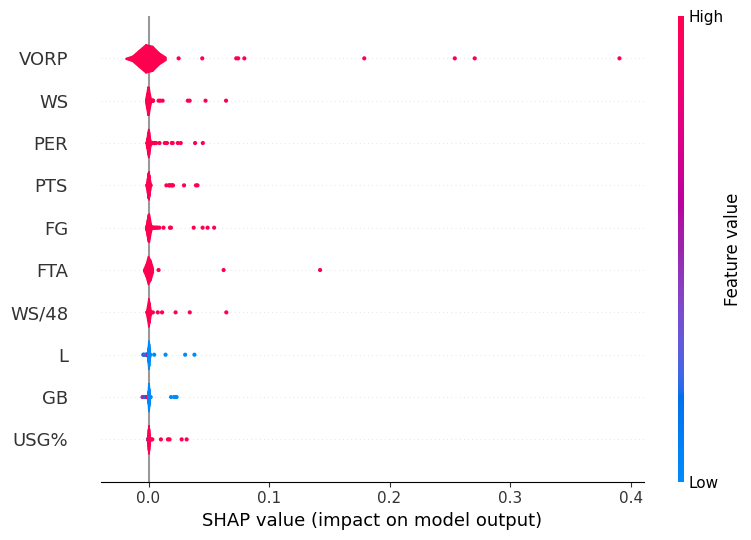

In [136]:
explainer = shap.Explainer(grid_rfg.predict, X_test_clean)

shap_values = explainer.shap_values(X_test_clean)

explainer = shap.Explainer(grid_rfg.predict, X_test_clean)

shap_values = explainer(X_test_clean)

shap.summary_plot(
    shap_values, 
    X_test_clean,
    plot_type="violin",
    color_bar=True,
    max_display=10, 
    show=False
)